In [1]:
library("mixOmics")
library("readxl")
library("dplyr")
library("tibble")
library("rgl")

Loading required package: MASS

Loading required package: lattice

Loading required package: ggplot2


Loaded mixOmics 6.12.2
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  citation('mixOmics')



Attaching package: ‘dplyr’


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### Import data 
#### Read the rpkm values

In [2]:
setwd("/Users/parbab/Desktop/RNA-seq/Results/Mouse/")

In [3]:
genes <- read_excel("CAMeLEOm_Mouse_rpkm.xlsx") %>%
        as.data.frame() %>%
        column_to_rownames("ENSEMBL")  %>%
        t %>%
        as.data.frame() %>%
        rownames_to_column("SampleID") %>%
        filter(SampleID != "029_63") %>%
        column_to_rownames("SampleID")

metadata <- read_xlsx("029_Metadata_Mice.xlsx") %>% 
            select(c("Basespace ID", "Condition1")) %>% 
            dplyr::rename(SampleID = "Basespace ID", Condition = "Condition1") %>%
            filter(SampleID != "029_63")

#### metadata

In [4]:
metadata_nr <- metadata %>% filter(Condition %in% c("NR", "Control of NR", "NR + PT"))

metadata_mr <- metadata %>% filter(Condition %in% c("MR", "Control of MR", "RMC"))

metadata_dr <- metadata %>% filter(Condition %in% c("DR", "Control of DR"))

In [5]:
genes_subset_nr <- genes %>% 
                rownames_to_column("SampleID") %>%
                filter(SampleID %in% metadata_nr$SampleID) %>%
                column_to_rownames("SampleID")

genes_subset_mr <- genes %>% 
                rownames_to_column("SampleID") %>%
                filter(SampleID %in% metadata_mr$SampleID) %>%
                column_to_rownames("SampleID")

genes_subset_dr <- genes %>% 
                rownames_to_column("SampleID") %>%
                filter(SampleID %in% metadata_dr$SampleID) %>%
                column_to_rownames("SampleID")

In [6]:
data <- list("genes" = genes, "metadata" = metadata)

data_nr <- list("genes" = genes_subset_nr, "metadata" = metadata_nr)

data_mr <- list("genes" = genes_subset_mr, "metadata" = metadata_mr)

data_dr <- list("genes" = genes_subset_dr, "metadata" = metadata_dr)

### PCA

#### All cohorts

##### Tuning

###### Scaled

Eigenvalues for the first 10 principal components, see object$sdev^2: 
      PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8 
4421.3631 1673.2284 1637.8319  957.7877  854.8572  747.6109  624.7907  525.0945 
      PC9      PC10 
 458.4442  367.8955 

Proportion of explained variance for the first 10 principal components, see object$explained_variance: 
       PC1        PC2        PC3        PC4        PC5        PC6        PC7 
0.22385515 0.08471613 0.08292400 0.04849312 0.04328172 0.03785180 0.03163337 
       PC8        PC9       PC10 
0.02658572 0.02321119 0.01862668 

Cumulative proportion explained variance for the first 10 principal components, see object$cum.var: 
      PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8 
0.2238552 0.3085713 0.3914953 0.4399884 0.4832701 0.5211219 0.5527553 0.5793410 
      PC9      PC10 
0.6025522 0.6211789 

 Other available components: 
 -------------------- 
 loading vectors: see object$rotatio

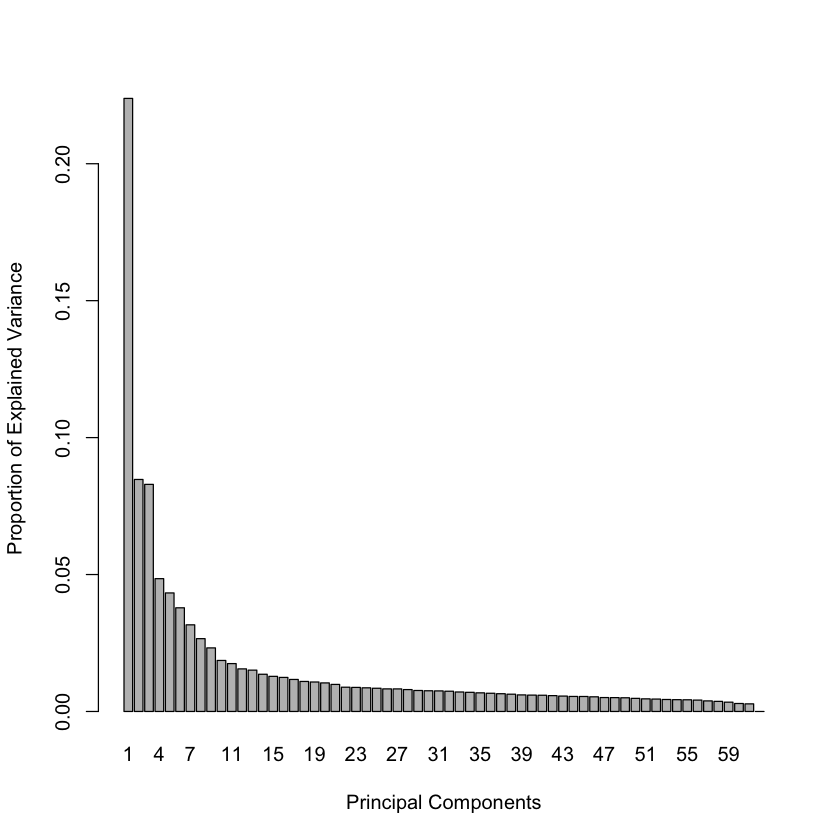

In [7]:
tune.pca(data$genes, center = TRUE, scale = TRUE)

###### Not scaled

Eigenvalues for the first 10 principal components, see object$sdev^2: 
      PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8 
1523.0440  982.9817  711.5597  447.2274  357.1353  260.6514  217.1764  180.2424 
      PC9      PC10 
 135.3983  122.5619 

Proportion of explained variance for the first 10 principal components, see object$explained_variance: 
       PC1        PC2        PC3        PC4        PC5        PC6        PC7 
0.20667687 0.13339049 0.09655855 0.06068870 0.04846321 0.03537036 0.02947081 
       PC8        PC9       PC10 
0.02445887 0.01837353 0.01663163 

Cumulative proportion explained variance for the first 10 principal components, see object$cum.var: 
      PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8 
0.2066769 0.3400674 0.4366259 0.4973146 0.5457778 0.5811482 0.6106190 0.6350779 
      PC9      PC10 
0.6534514 0.6700830 

 Other available components: 
 -------------------- 
 loading vectors: see object$rotatio

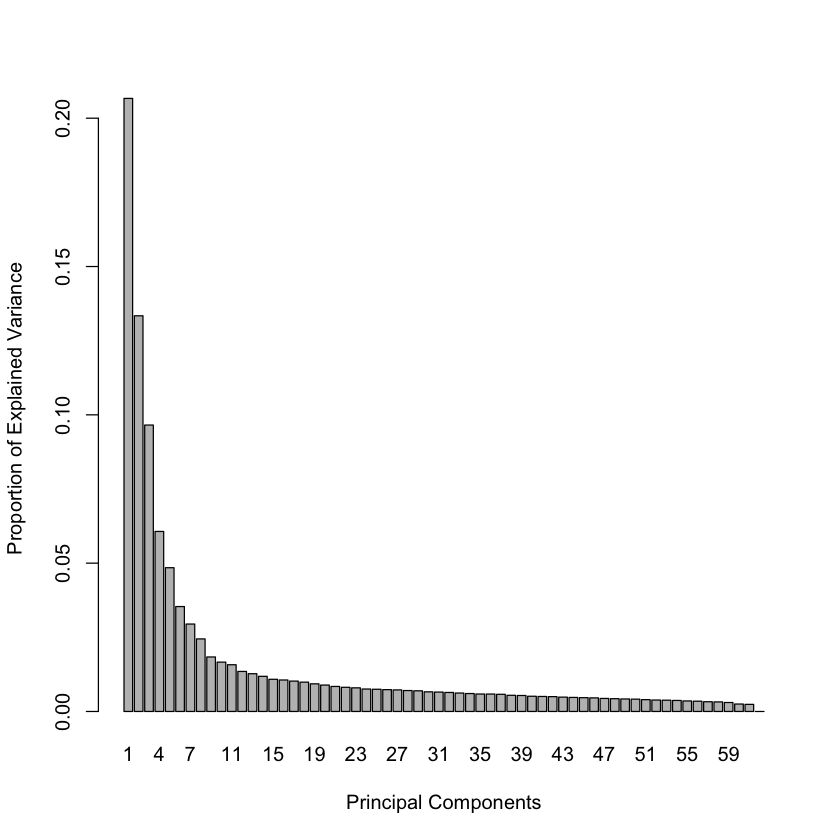

In [8]:
tune.pca(data$genes, center = TRUE, scale = FALSE)

##### Sample plots

###### Components 1 & 2

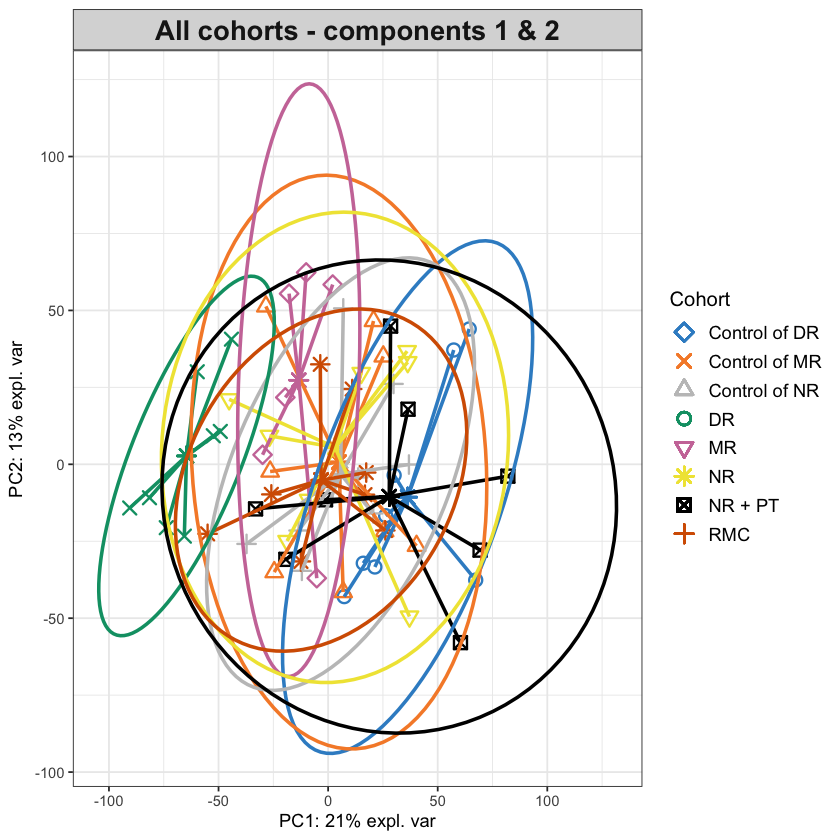

In [43]:
res.pca <- pca(data$genes, ncomp = 4)

plotIndiv(res.pca, 
          group = data$metadata$Condition, 
          legend = TRUE,
          legend.title = "Cohort",
          ellipse = TRUE,
          centroid = TRUE,
          star = TRUE,
          title = "All cohorts - components 1 & 2",
          ind.names = FALSE)

###### Components 1 & 3

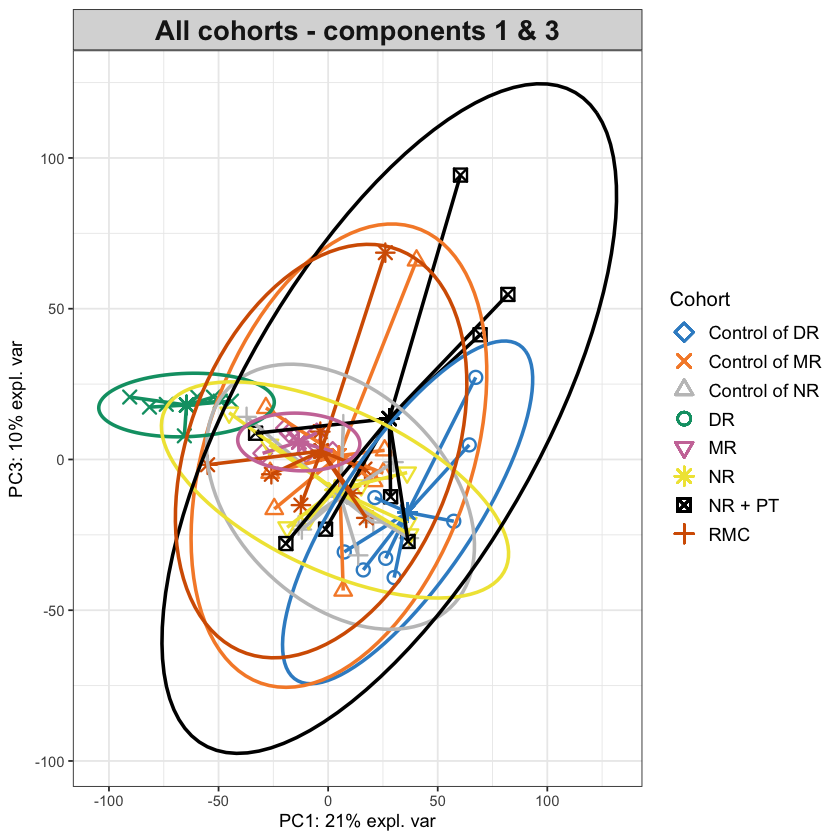

In [11]:
plotIndiv(res.pca, 
          group = data$metadata$Condition, 
          legend = TRUE,
          legend.title = "Cohort",
          ellipse = TRUE,
          centroid = TRUE,
          star = TRUE,
          title = "All cohorts - components 1 & 3",
          ind.names = FALSE,
          comp = c(1,3))

###### Components 2 & 3

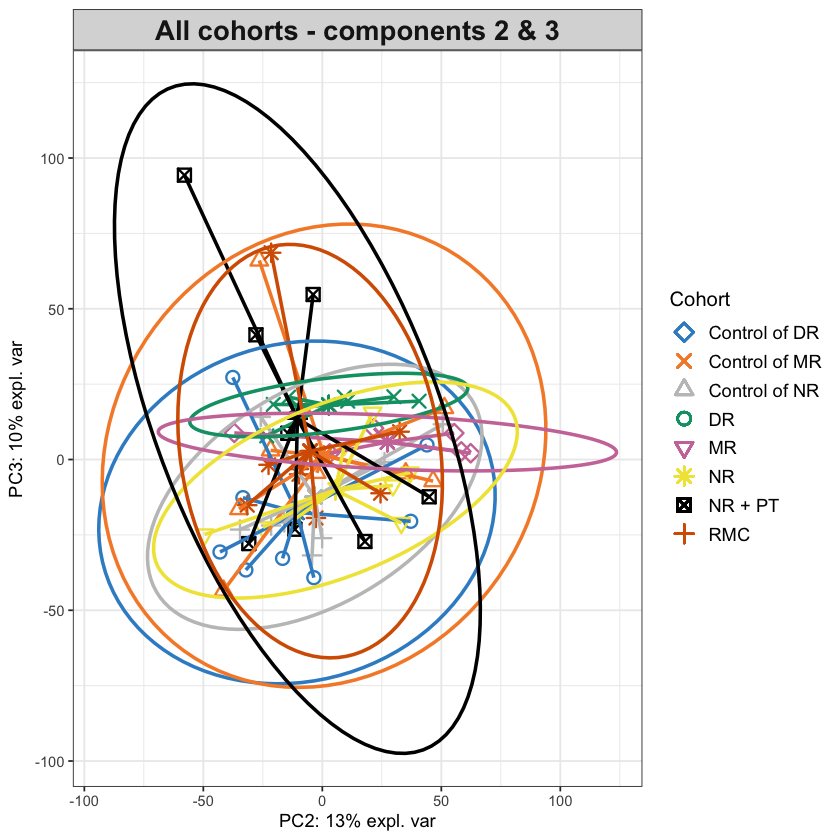

In [12]:
plotIndiv(res.pca, 
          group = data$metadata$Condition, 
          legend = TRUE,
          legend.title = "Cohort",
          ellipse = TRUE,
          centroid = TRUE,
          star = TRUE,
          title = "All cohorts - components 2 & 3",
          ind.names = FALSE,
          comp = c(2,3))

###### Amount of variance explained

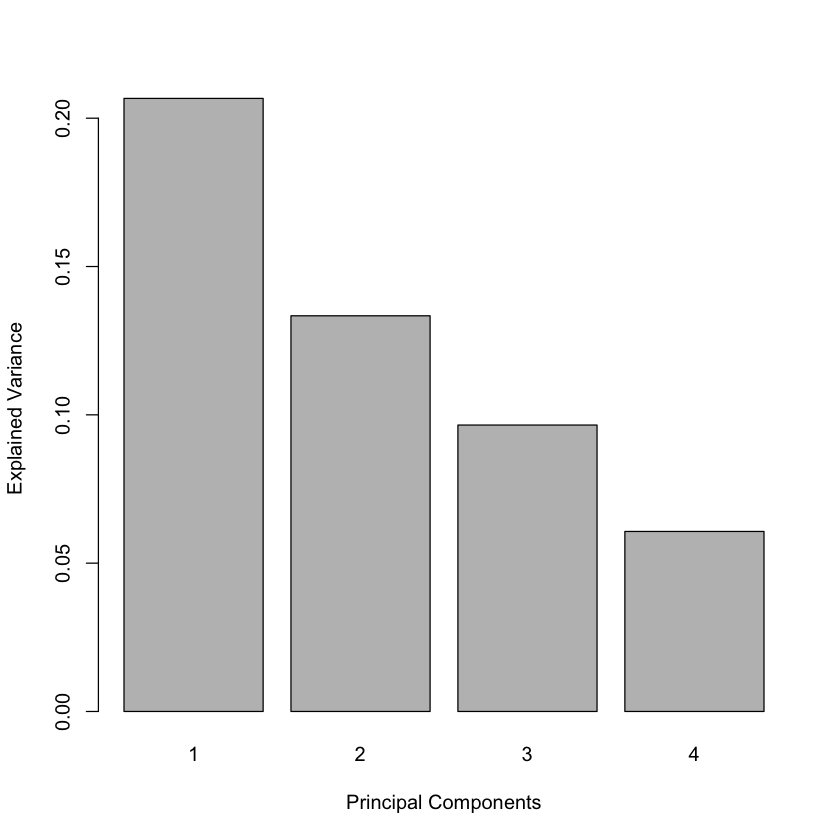

In [13]:
plot(res.pca)

##### Variable plots

###### Correlation circle plot

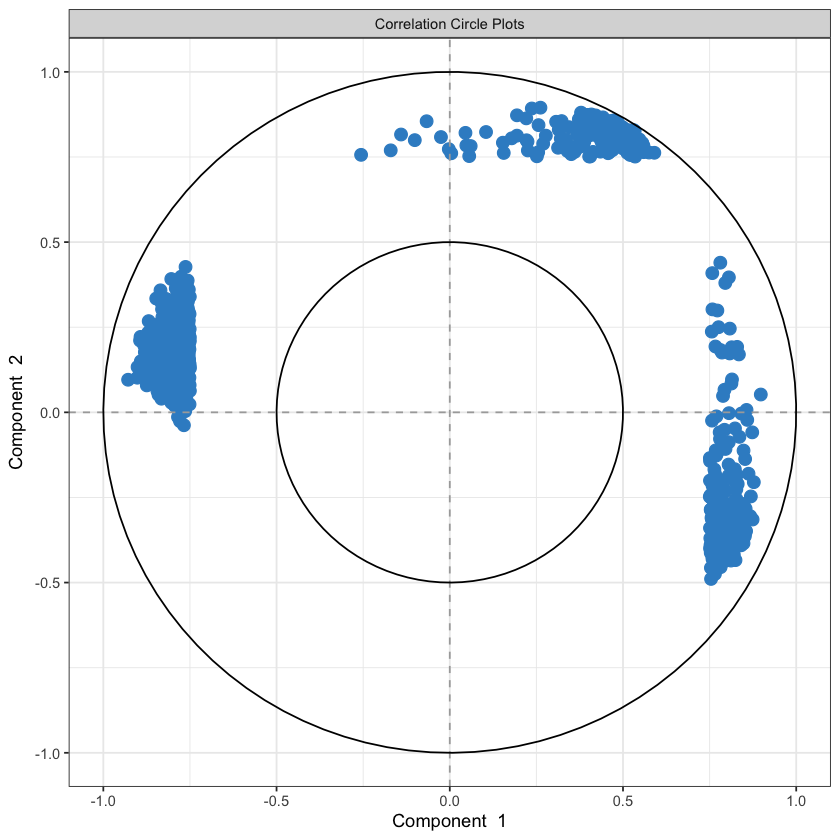

In [21]:
plotVar(res.pca, cutoff = 0.75, pch = 20)   

###### Loadings on component 1

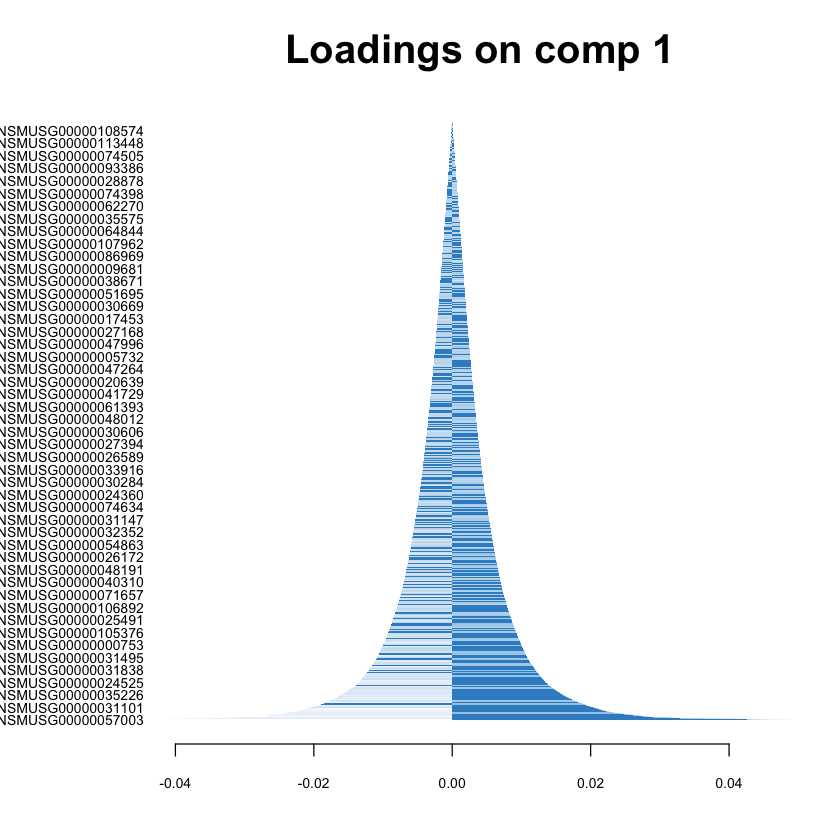

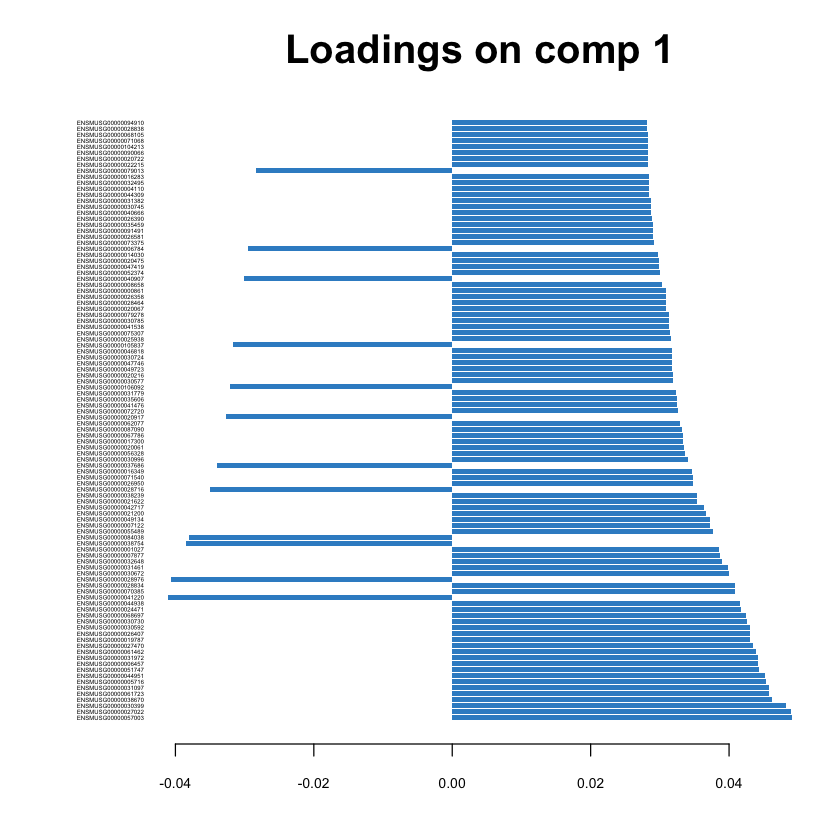

In [17]:
plotLoadings(res.pca)
plotLoadings(res.pca, ndisplay = 100, size.name = rel(0.3))

###### Loadings on component 2

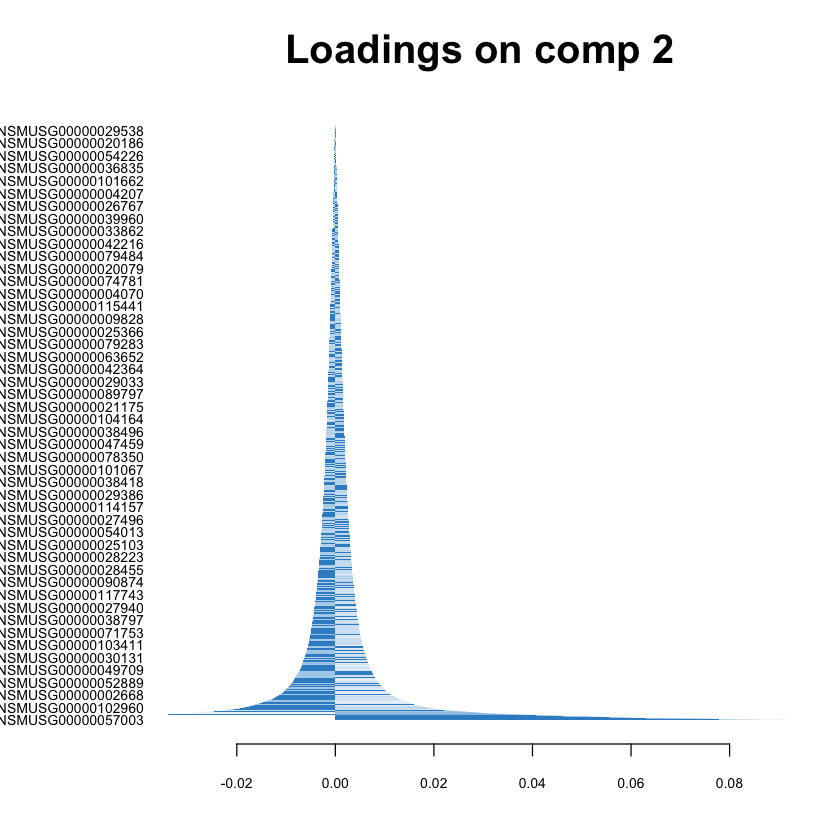

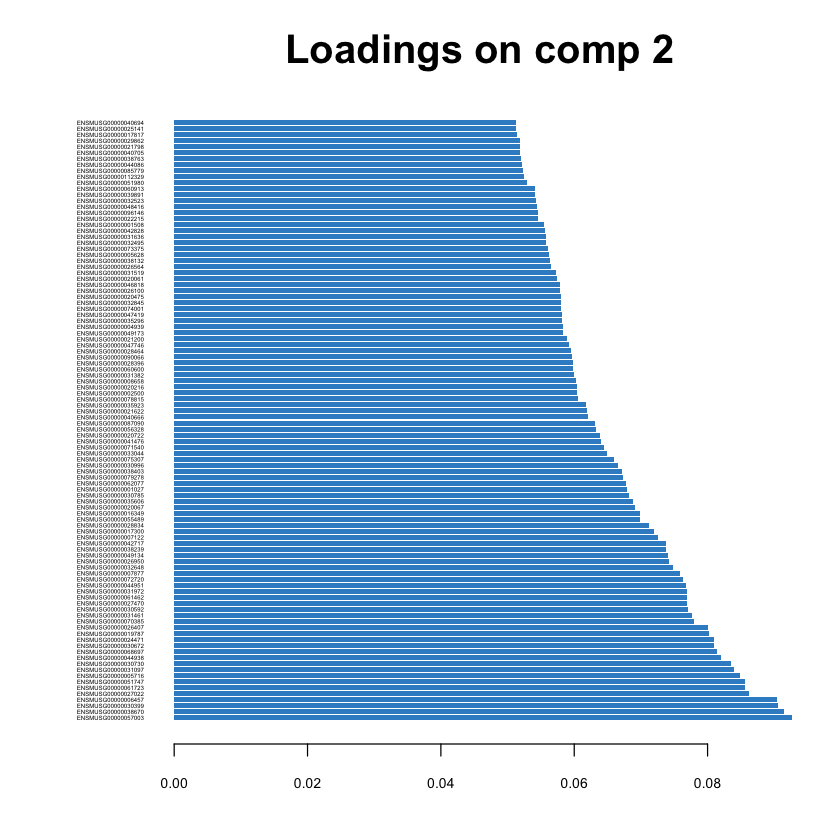

In [18]:
plotLoadings(res.pca, comp = 2)
plotLoadings(res.pca, comp = 2, ndisplay = 100, size.name = rel(0.3))

#### NR - MR - DR cohorts

##### Tuning

###### Scaled

Eigenvalues for the first 10 principal components, see object$sdev^2: 
      PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8 
8390.6157 1772.7738 1556.0694 1230.8714 1135.5849  812.7087  750.1975  683.0288 
      PC9      PC10 
 676.2710  646.2168 

Proportion of explained variance for the first 10 principal components, see object$explained_variance: 
       PC1        PC2        PC3        PC4        PC5        PC6        PC7 
0.42481979 0.08975615 0.07878434 0.06231945 0.05749506 0.04114773 0.03798276 
       PC8        PC9       PC10 
0.03458198 0.03423984 0.03271818 

Cumulative proportion explained variance for the first 10 principal components, see object$cum.var: 
      PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8 
0.4248198 0.5145759 0.5933603 0.6556797 0.7131748 0.7543225 0.7923053 0.8268873 
      PC9      PC10 
0.8611271 0.8938453 

 Other available components: 
 -------------------- 
 loading vectors: see object$rotatio

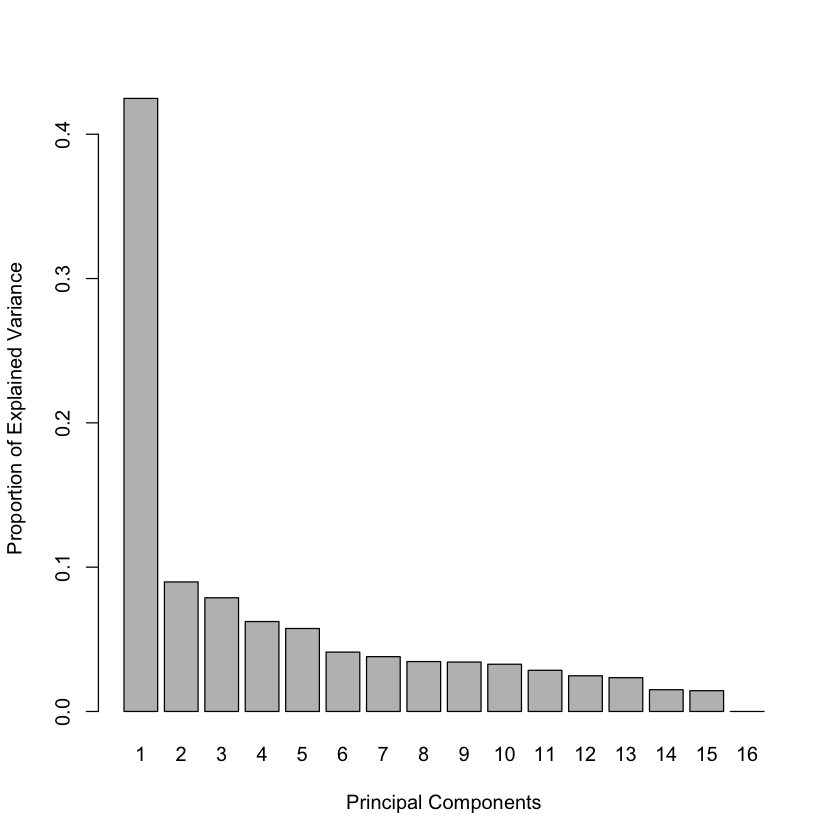

In [116]:
tune.pca(data_dr$genes, center = TRUE, scale = TRUE)

###### Not scaled

Eigenvalues for the first 10 principal components, see object$sdev^2: 
      PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8 
3580.7114 1126.4722  597.7241  488.7221  382.8137  340.0779  250.2252  230.6342 
      PC9      PC10 
 212.6846  193.5827 

Proportion of explained variance for the first 10 principal components, see object$explained_variance: 
       PC1        PC2        PC3        PC4        PC5        PC6        PC7 
0.44600341 0.14031023 0.07445085 0.06087386 0.04768220 0.04235916 0.03116735 
       PC8        PC9       PC10 
0.02872715 0.02649140 0.02411212 

Cumulative proportion explained variance for the first 10 principal components, see object$cum.var: 
      PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8 
0.4460034 0.5863136 0.6607645 0.7216383 0.7693205 0.8116797 0.8428471 0.8715742 
      PC9      PC10 
0.8980656 0.9221777 

 Other available components: 
 -------------------- 
 loading vectors: see object$rotatio

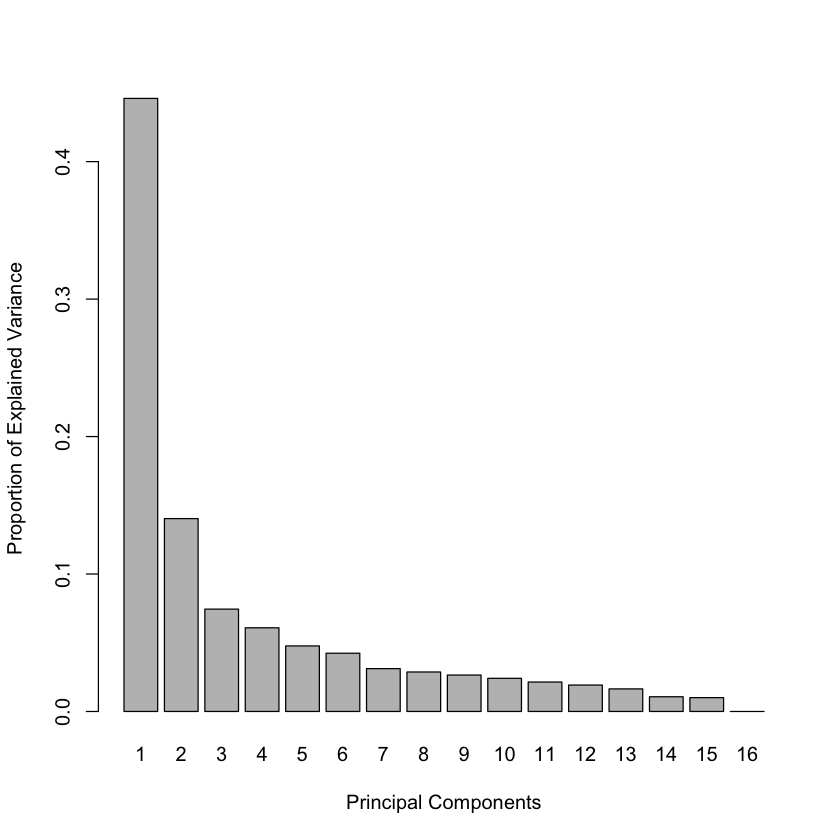

In [117]:
tune.pca(data_dr$genes, center = TRUE, scale = FALSE)

##### Sample plots

###### Components 1 & 2

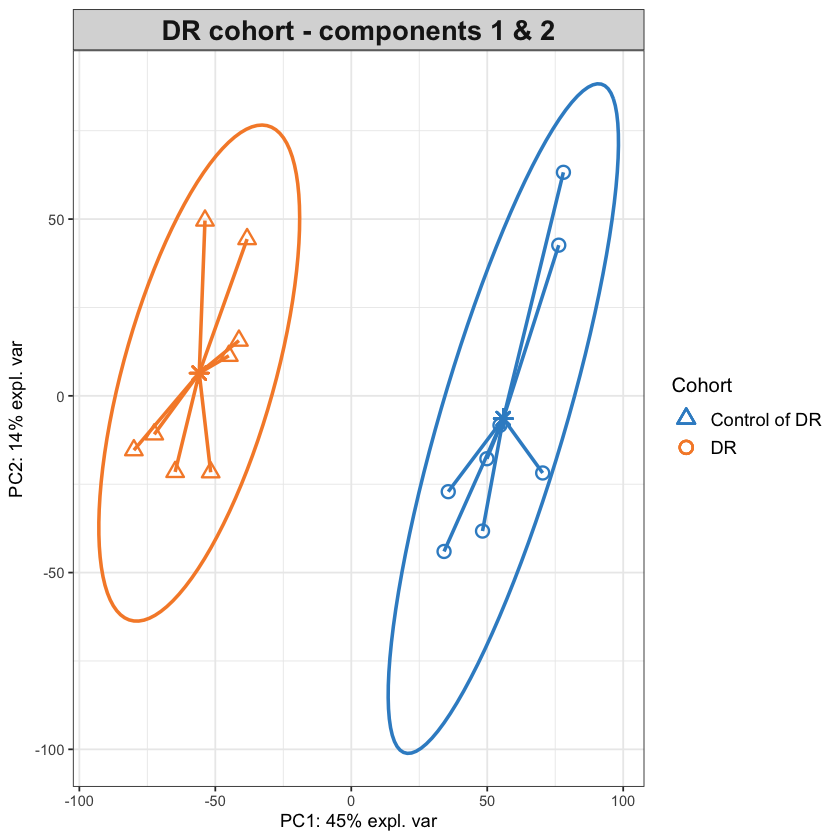

In [118]:
res.pca <- pca(data_dr$genes, ncomp = 3)

plotIndiv(res.pca, 
          group = data_dr$metadata$Condition, 
          legend = TRUE,
          legend.title = "Cohort",
          ellipse = TRUE,
          centroid = TRUE,
          star = TRUE,
          title = "DR cohort - components 1 & 2",
          ind.names = FALSE)

###### Components 1 & 3

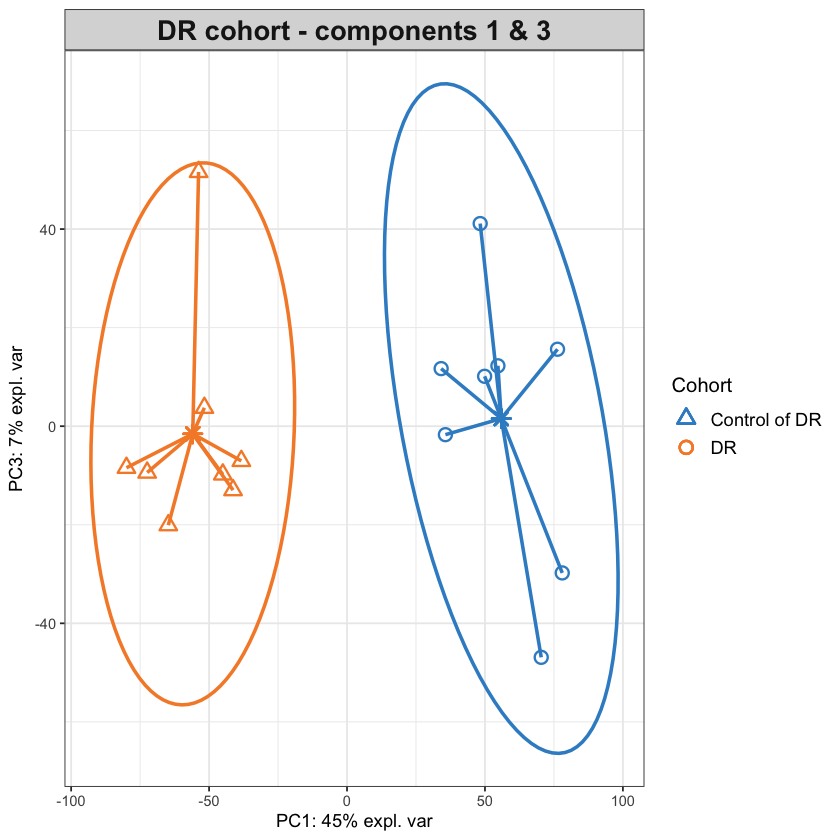

In [119]:
plotIndiv(res.pca, 
          group = data_dr$metadata$Condition, 
          legend = TRUE,
          legend.title = "Cohort",
          ellipse = TRUE,
          centroid = TRUE,
          star = TRUE,
          title = "DR cohort - components 1 & 3",
          ind.names = FALSE,
          comp = c(1,3))

###### Components 2 & 3

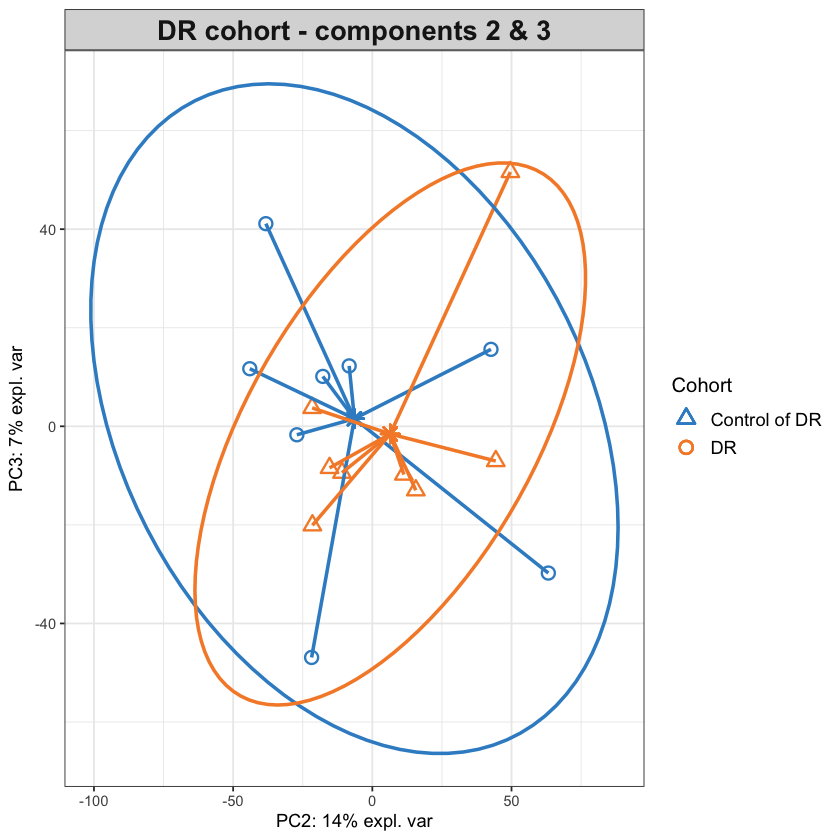

In [120]:
plotIndiv(res.pca, 
          group = data_dr$metadata$Condition, 
          legend = TRUE,
          legend.title = "Cohort",
          ellipse = TRUE,
          centroid = TRUE,
          star = TRUE,
          title = "DR cohort - components 2 & 3",
          ind.names = FALSE,
          comp = c(2,3))

### sPCA

Biological question : 
- apply PCA 
- identify the key variables that contribute to the explanation of most variance in the data set.

In [22]:
res.spca <- spca(data$genes, ncomp = 3, keepX = c(25,20,15))

#### Sample plots

##### Components 1 & 2

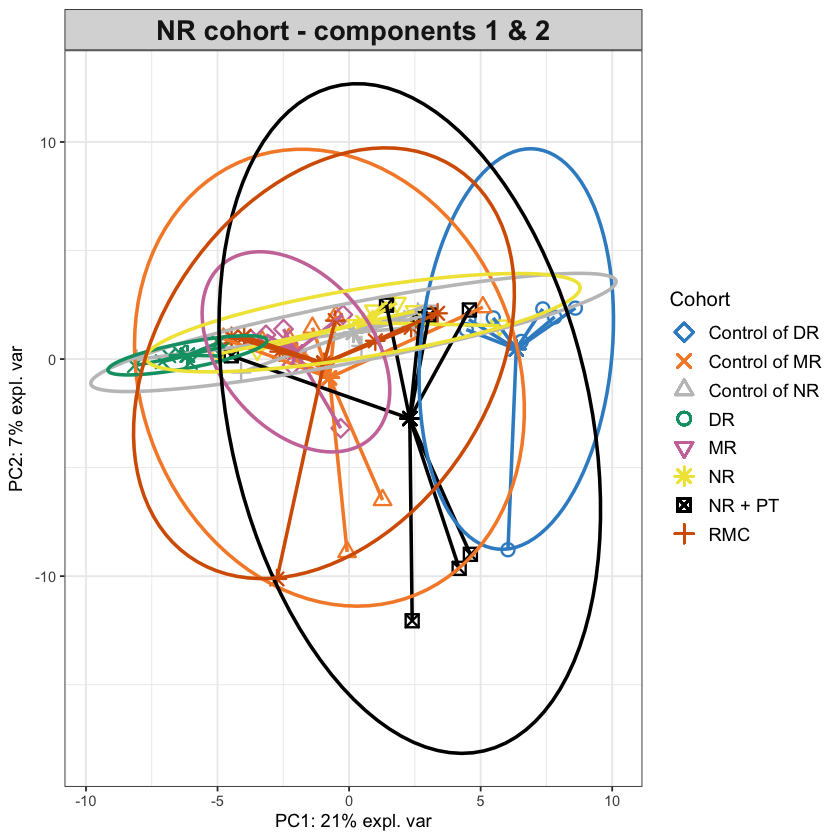

In [24]:
plotIndiv(res.spca, 
          group = data$metadata$Condition, 
          legend = TRUE,
          legend.title = "Cohort",
          ellipse = TRUE,
          centroid = TRUE,
          star = TRUE,
          title = "NR cohort - components 1 & 2",
          ind.names = FALSE)

##### Components 1 & 3

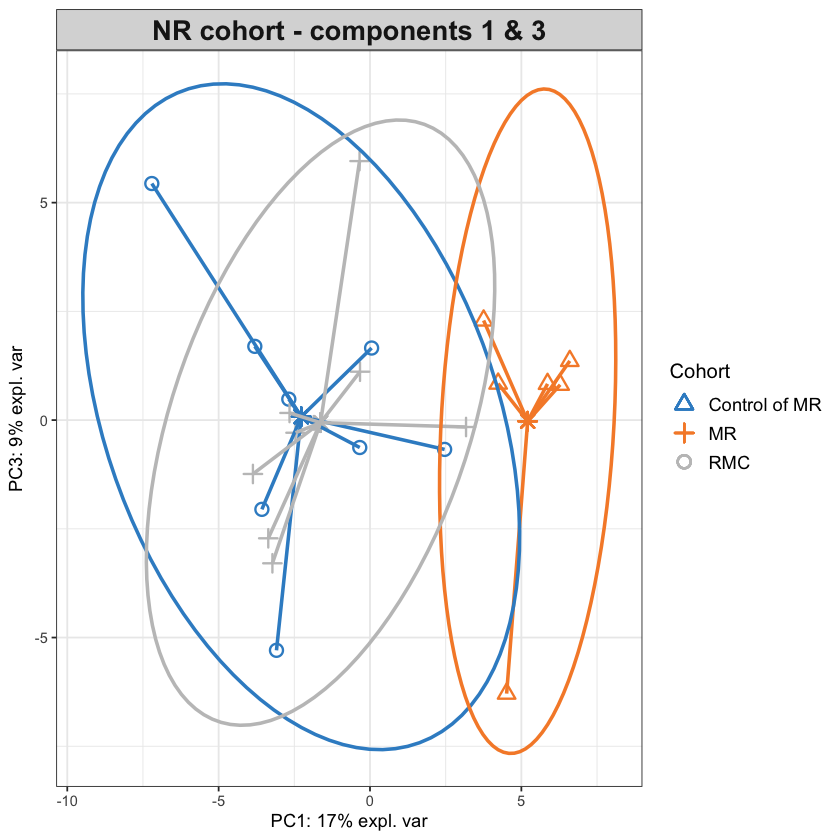

In [226]:
plotIndiv(MyResult.spca, 
          group = data_mr$metadata$Condition, 
          legend = TRUE,
          legend.title = "Cohort",
          ellipse = TRUE,
          centroid = TRUE,
          star = TRUE,
          title = "NR cohort - components 1 & 3",
          ind.names = FALSE,
         comp = c(1,3))

##### Components 2 & 3

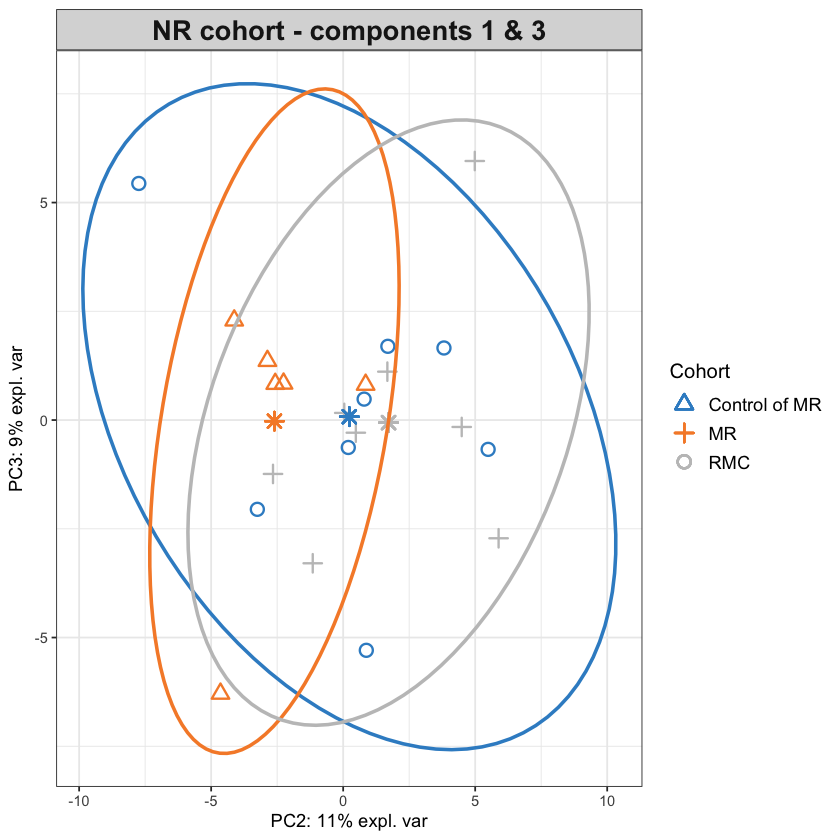

In [227]:
plotIndiv(MyResult.spca, 
          group = data_mr$metadata$Condition, 
          legend = TRUE,
          legend.title = "Cohort",
          ellipse = TRUE,
          centroid = TRUE,
          #star = TRUE,
          title = "NR cohort - components 1 & 3",
          ind.names = FALSE,
         comp = c(2,3))

#### Varibale plots

##### Correlation circle plot

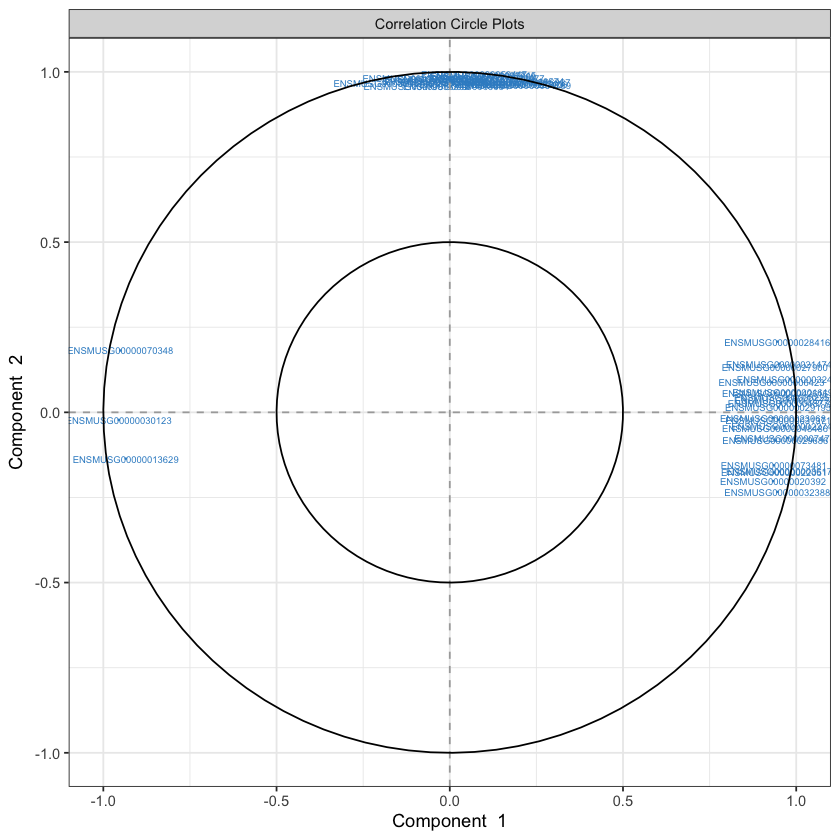

In [228]:
plotVar(MyResult.spca, cex = 2, cutoff = 0.7) 

In [229]:
selectVar(MyResult.spca, comp = 1)$value

value.var   
ENSMUSG00000032437  0.404425146
ENSMUSG00000057531  0.357294538
ENSMUSG00000074749  0.348192000
ENSMUSG00000022555  0.341263858
ENSMUSG00000016194  0.306219523
ENSMUSG00000022747  0.284146288
ENSMUSG00000048772  0.206875852
ENSMUSG00000030123 -0.205544619
ENSMUSG00000003617  0.172050383
ENSMUSG00000070348 -0.170667326
ENSMUSG00000021474  0.169765942
ENSMUSG00000031371  0.151488035
ENSMUSG00000029195  0.151099714
ENSMUSG00000032388  0.134764975
ENSMUSG00000028416  0.132411486
ENSMUSG00000029686  0.091169416
ENSMUSG00000042616  0.084894241
ENSMUSG00000048486  0.084225912
ENSMUSG00000027900  0.079345048
ENSMUSG00000022051  0.063913905
ENSMUSG00000073481  0.056568762
ENSMUSG00000013629 -0.054895414
ENSMUSG00000020392  0.040578225
ENSMUSG00000023068  0.039480018
ENSMUSG00000006423  0.009533921

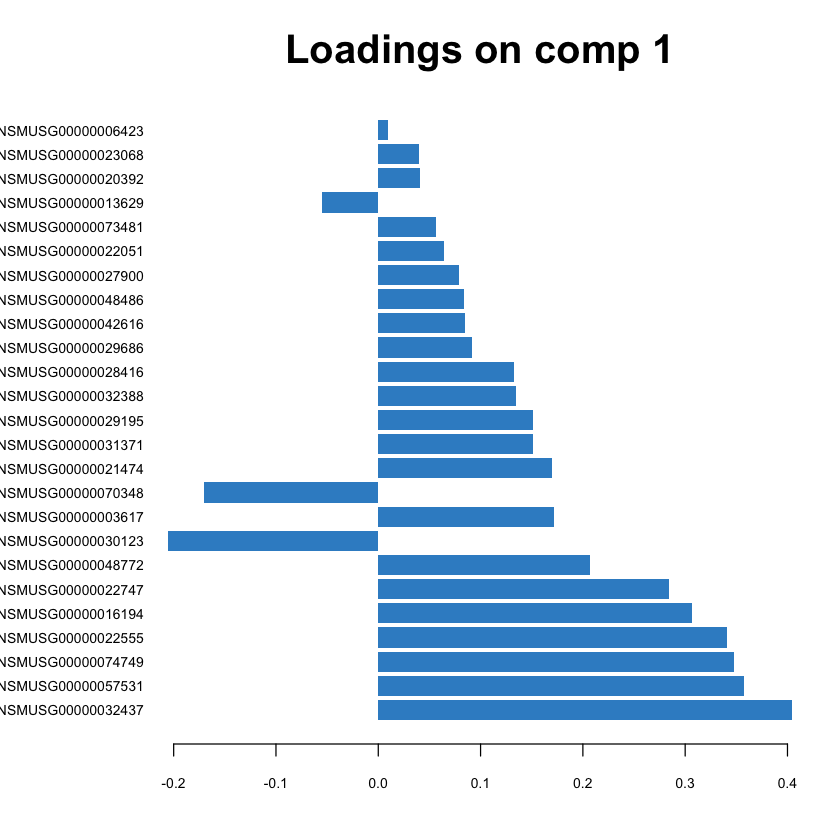

In [230]:
plotLoadings(MyResult.spca, comp = 1)

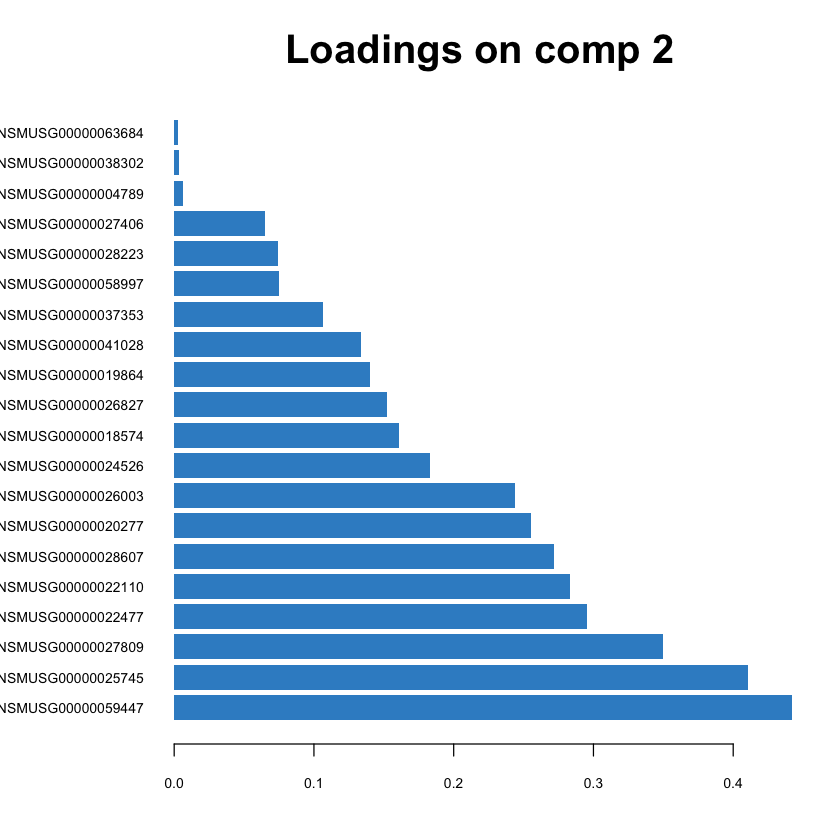

In [231]:
plotLoadings(MyResult.spca, comp = 2)

### IPCA

In [97]:
ipca.res <- ipca(data_nr$genes, ncomp = 3)

Warning message in ipc[, 1]/sqrt(crossprod(ipc[, 1])):
“Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
”
Warning message in ipc[, h]/sqrt(crossprod(ipc[, h])):
“Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
”
Warning message in ipc[, h]/sqrt(crossprod(ipc[, h])):
“Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
”


#### Kurtosis

The kurtosis measure is used to order the loading vectors to order the Independent Principal Components. The kurtosis value is a good post hoc indicator of the number of components to choose, as a sudden drop in the values corresponds to irrelevant dimensions.

In [98]:
ipca.res$kurtosis

[1] 66.690206 12.512694  5.614225

#### Sample plots

##### Components 1 & 2

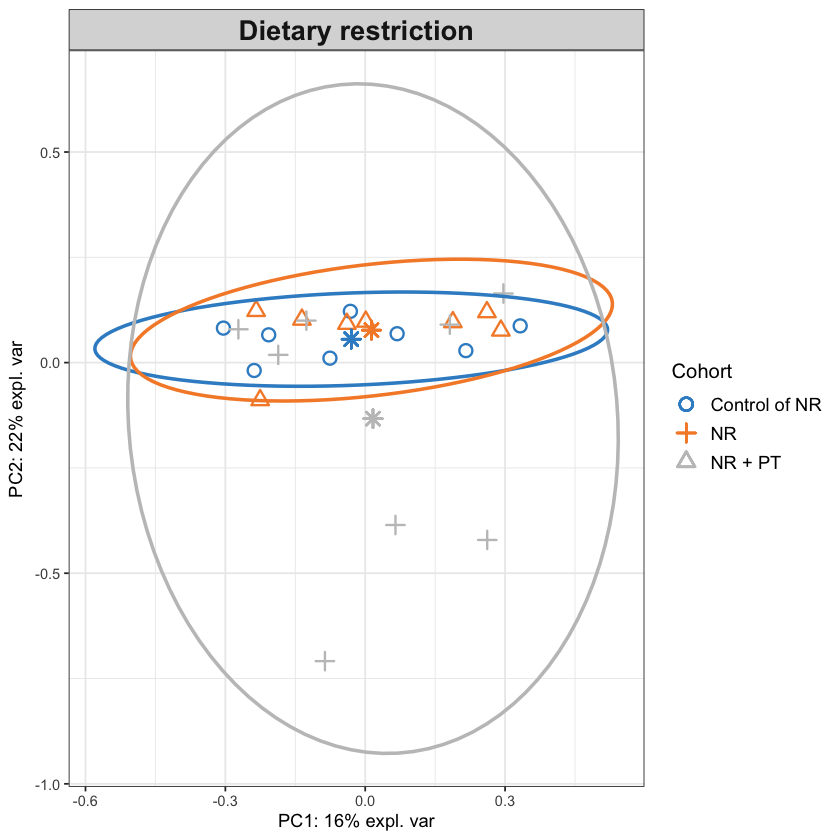

In [99]:
plotIndiv(ipca.res, 
          group = data$metadata$Condition, 
          legend = TRUE,
          legend.title = "Cohort",
          ellipse = TRUE,
          centroid = TRUE,
          #star = TRUE,
          title = "Dietary restriction",
          ind.names = FALSE,
          comp = c(1,2))

##### Components 1 & 3

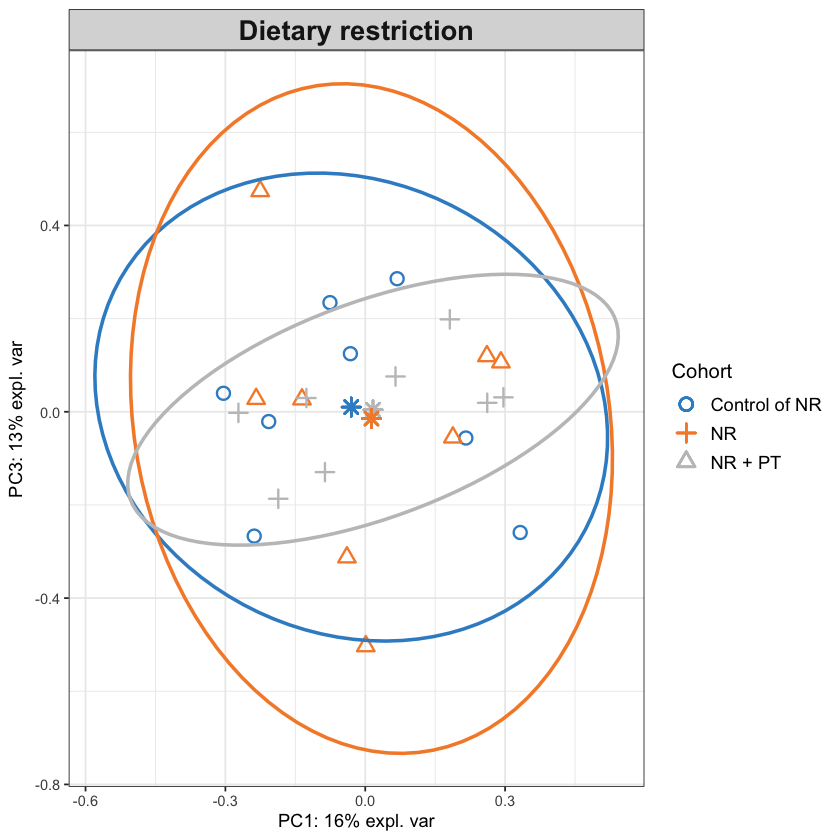

In [100]:
plotIndiv(ipca.res, 
          group = data$metadata$Condition, 
          legend = TRUE,
          legend.title = "Cohort",
          ellipse = TRUE,
          centroid = TRUE,
          #star = TRUE,
          title = "Dietary restriction",
          ind.names = FALSE,
          comp = c(1,3))

##### Components 2 & 3

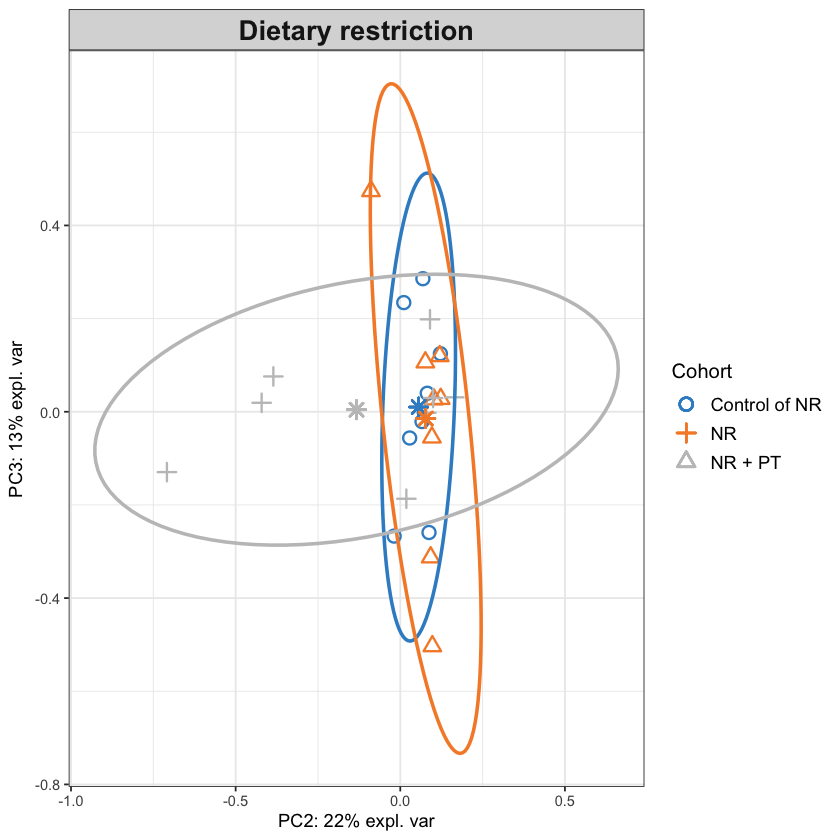

In [101]:
plotIndiv(ipca.res, 
          group = data$metadata$Condition, 
          legend = TRUE,
          legend.title = "Cohort",
          ellipse = TRUE,
          centroid = TRUE,
          #star = TRUE,
          title = "Dietary restriction",
          ind.names = FALSE,
          comp = c(2,3))

##### IPCA with 2 components

In [102]:
ipca_2.res <- ipca(data_nr$genes, scale = TRUE)

Warning message in ipc[, 1]/sqrt(crossprod(ipc[, 1])):
“Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
”
Warning message in ipc[, h]/sqrt(crossprod(ipc[, h])):
“Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
”


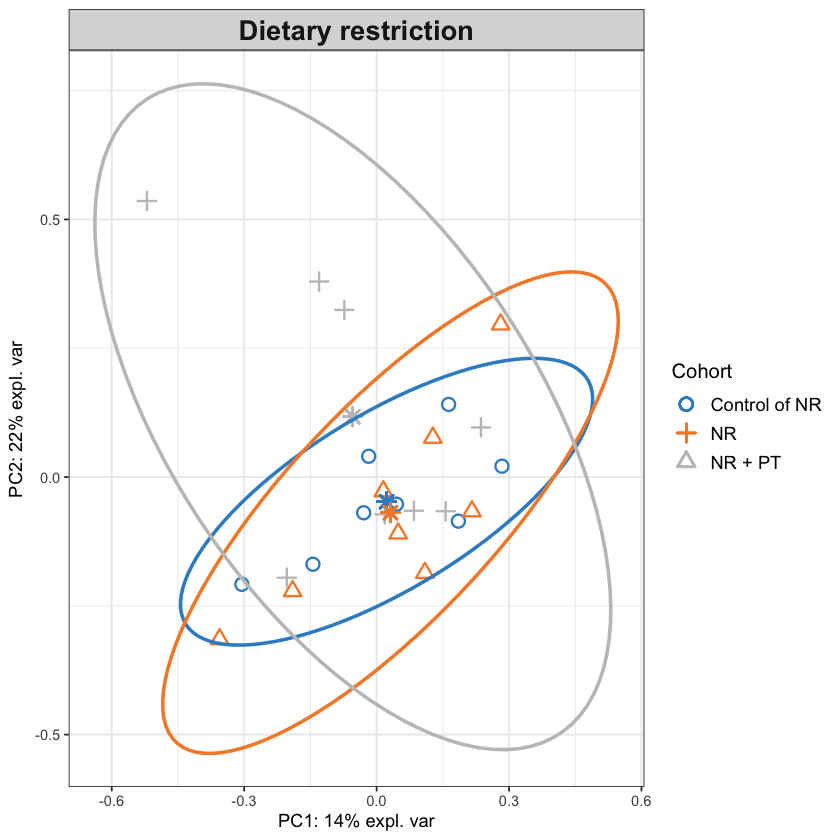

In [103]:
plotIndiv(ipca_2.res, 
          group = data$metadata$Condition, 
          legend = TRUE,
          legend.title = "Cohort",
          ellipse = TRUE,
          centroid = TRUE,
          #star = TRUE,
          title = "Dietary restriction",
          ind.names = FALSE,
          comp = c(1,2))

#### Variable plots

In [104]:
head(selectVar(ipca.res, comp = 1)$value)

value.var   
ENSMUSG00000057003 0.0006976882
ENSMUSG00000030399 0.0006787704
ENSMUSG00000038670 0.0006742059
ENSMUSG00000005716 0.0006484278
ENSMUSG00000027022 0.0006472962
ENSMUSG00000006457 0.0006452740

In [105]:
head(selectVar(MyResult_mouse.pca, comp = 1)$value)

value.var 
ENSMUSG00000024673 0.05438255
ENSMUSG00000059898 0.05302367
ENSMUSG00000042474 0.05253880
ENSMUSG00000030577 0.05207188
ENSMUSG00000032053 0.05080851
ENSMUSG00000030724 0.05029643

##### Correlation circle plot

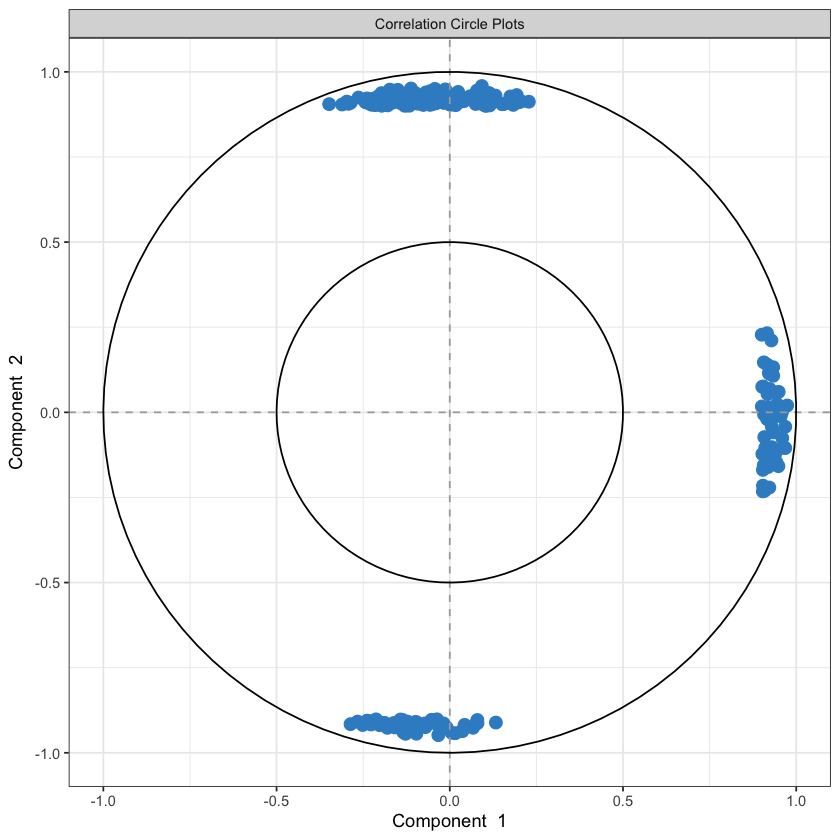

In [106]:
plotVar(ipca_2.res, cutoff = 0.9, pch = 20)

### sIPCA

In [167]:
sipca.res <- sipca(data$genes, ncomp = 3, mode = "deflation",
                         scale = FALSE, keepX = c(50,50,50))

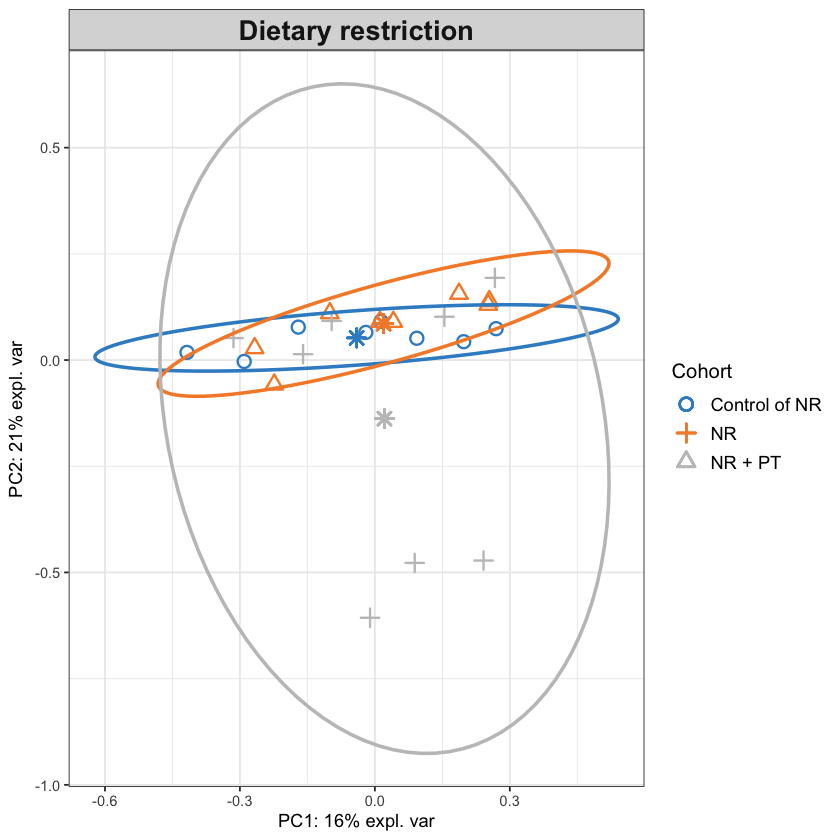

In [168]:
plotIndiv(sipca.res, 
          group = data$metadata$Condition, 
          legend = TRUE,
          legend.title = "Cohort",
          ellipse = TRUE,
          centroid = TRUE,
          #star = TRUE,
          title = "Dietary restriction",
          ind.names = FALSE)

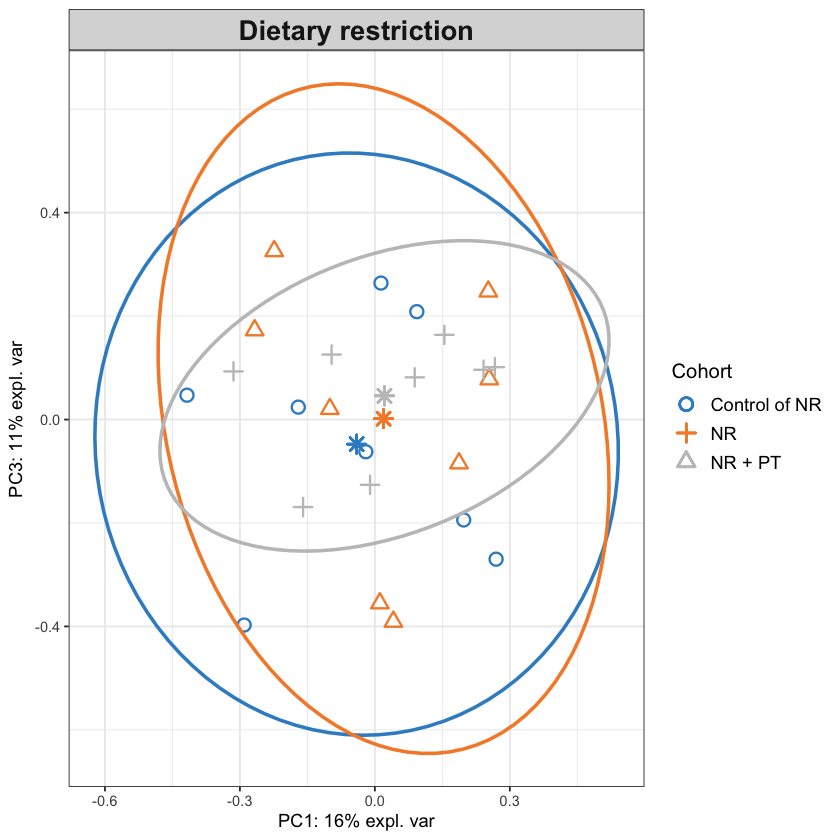

In [169]:
plotIndiv(sipca.res, 
          group = data$metadata$Condition, 
          legend = TRUE,
          legend.title = "Cohort",
          ellipse = TRUE,
          centroid = TRUE,
          #star = TRUE,
          title = "Dietary restriction",
          ind.names = FALSE,
          comp = c(1,3))

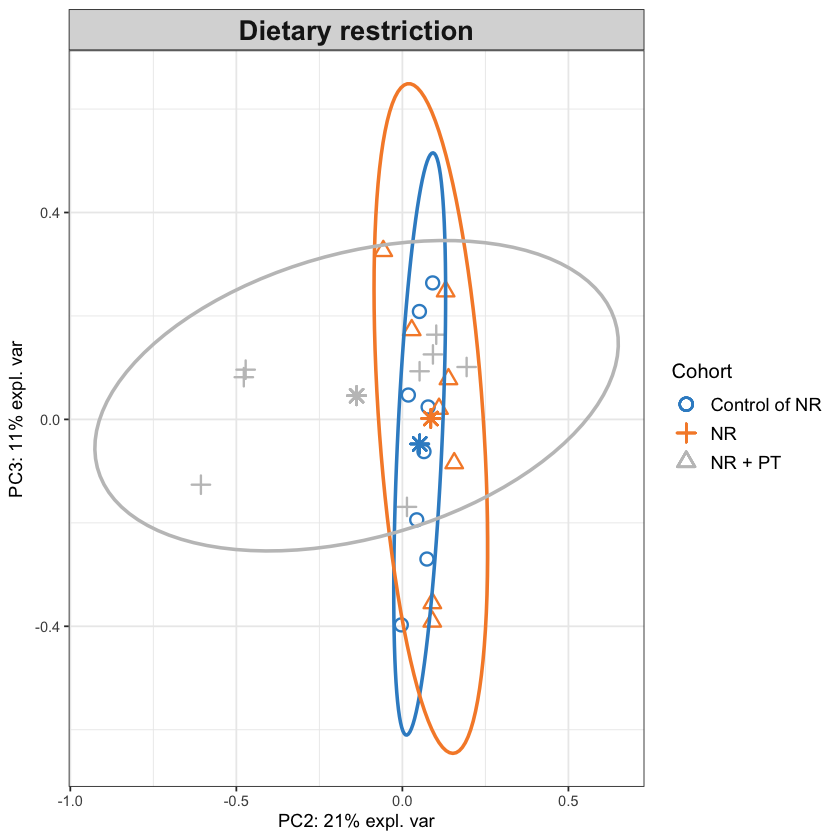

In [170]:
plotIndiv(sipca.res, 
          group = data$metadata$Condition, 
          legend = TRUE,
          legend.title = "Cohort",
          ellipse = TRUE,
          centroid = TRUE,
          #star = TRUE,
          title = "Dietary restriction",
          ind.names = FALSE,
          comp = c(2,3))

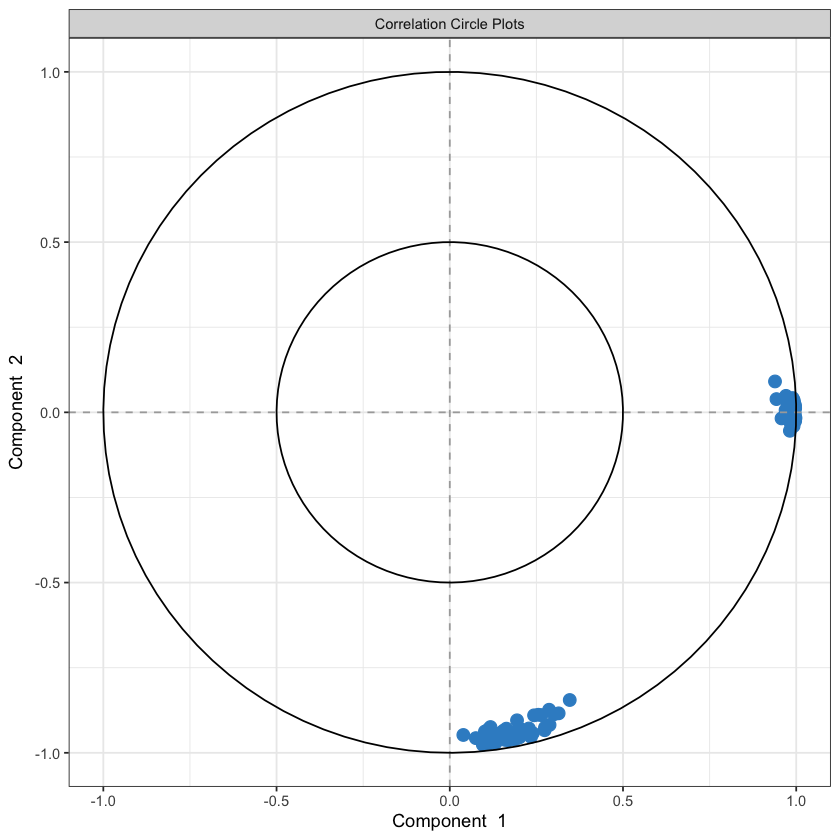

In [171]:
plotVar(sipca.res, pch = 20)

### PLS-DA

#### All cohorts

In [68]:
X <- data$genes
Y <- as.factor(data$metadata$Condition)

plsda.res <- plsda(X, Y, ncomp = 10)

perf.plsda <- perf(plsda.res, validation = "Mfold", folds = 5, 
                  progressBar = TRUE, auc = TRUE, nrepeat = 100) 


comp 1 
  |======================================================================| 100%
comp 2 
  |======================================================================| 100%
comp 3 
  |======================================================================| 100%
comp 4 
  |======================================================================| 100%
comp 5 
  |======================================================================| 100%
comp 6 
  |======================================================================| 100%
comp 7 
  |======================================================================| 100%
comp 8 
  |======================================================================| 100%
comp 9 
  |======================================================================| 100%
comp 10 
  |======================================================================| 100%


##### Classification error

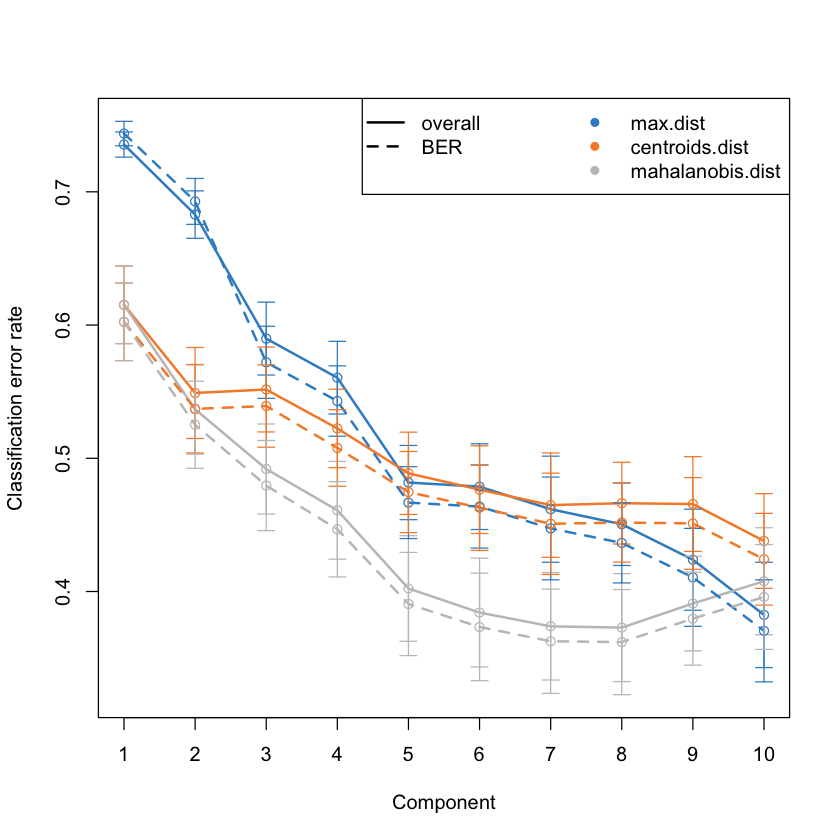

In [69]:
plot(perf.plsda, col = color.mixo(1:3), sd = TRUE, legend.position = "horizontal")

##### ROC

$Comp1
                             AUC   p-value
Control of DR vs Other(s) 0.9745 1.673e-05
Control of MR vs Other(s) 0.5440 6.899e-01
Control of NR vs Other(s) 0.5972 3.778e-01
DR vs Other(s)            1.0000 5.744e-06
MR vs Other(s)            0.7560 4.060e-02
NR vs Other(s)            0.5162 8.831e-01
NR + PT vs Other(s)       0.6898 8.510e-02
RMC vs Other(s)           0.5347 7.528e-01

$Comp2
                             AUC   p-value
Control of DR vs Other(s) 1.0000 5.744e-06
Control of MR vs Other(s) 0.8333 2.497e-03
Control of NR vs Other(s) 0.6574 1.533e-01
DR vs Other(s)            1.0000 5.744e-06
MR vs Other(s)            0.8363 7.135e-03
NR vs Other(s)            0.7986 6.754e-03
NR + PT vs Other(s)       0.6898 8.510e-02
RMC vs Other(s)           0.7523 2.209e-02

$Comp3
                             AUC   p-value
Control of DR vs Other(s) 1.0000 5.744e-06
Control of MR vs Other(s) 0.8403 2.024e-03
Control of NR vs Other(s) 0.8426 1.885e-03
DR vs Other(s)            1.000

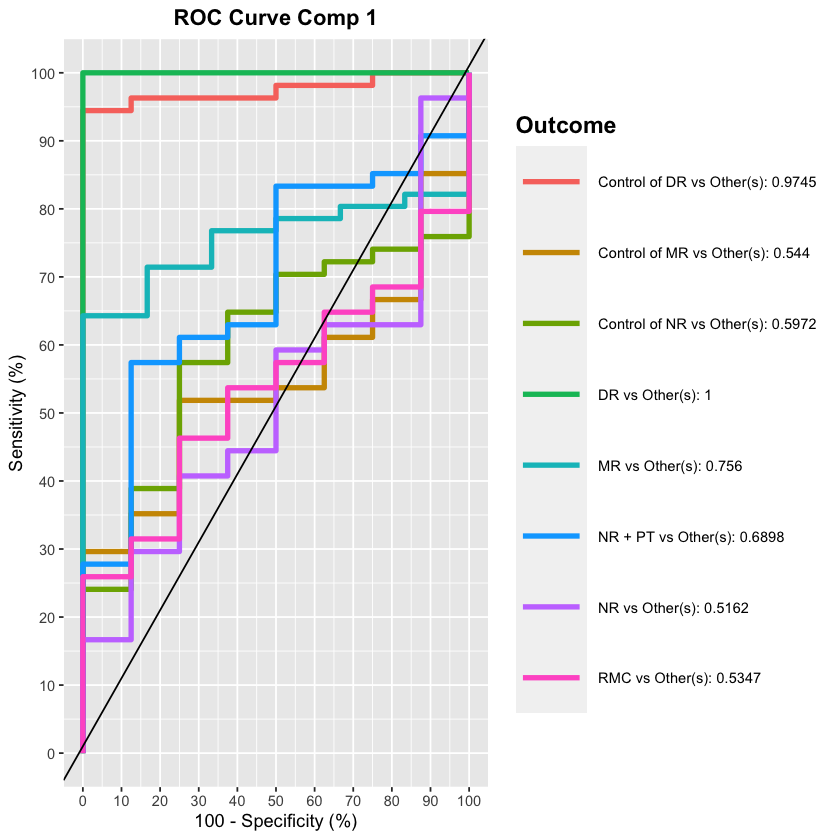

In [70]:
auc.plsda <- auroc(plsda.res)

##### sPLS-DA for variable selection (tuning)

In [46]:
# grid of possible keepX values that will be tested for each comp 
list.keepX <- c(seq(10, 100, 10))

tune.splsda <- tune.splsda(X, Y, ncomp = 10, validation = 'Mfold', folds = 5, 
                           progressBar = TRUE, dist = 'max.dist',
                           test.keepX = list.keepX, nrepeat = 100) #nrepeat 50-100 for better estimate
# tune.splsda.srbct  #the various outputs


comp 1 
  |========================================                              |  57%

#### NR - MR - DR

In [144]:
X <- data_nr$genes
Y <- as.factor(data_nr$metadata$Condition)

plsda.res <- plsda(X, Y, ncomp = 10)

perf.plsda <- perf(plsda.res, validation = "Mfold", folds = 5, 
                  progressBar = TRUE, auc = TRUE, nrepeat = 100) 


comp 1 
  |======================================================================| 100%
comp 2 
  |======================================================================| 100%
comp 3 
  |======================================================================| 100%
comp 4 
  |======================================================================| 100%
comp 5 
  |======================================================================| 100%
comp 6 
  |======================================================================| 100%
comp 7 
  |======================================================================| 100%
comp 8 
  |======================================================================| 100%
comp 9 
  |======================================================================| 100%
comp 10 
  |======================================================================| 100%


##### Classification error

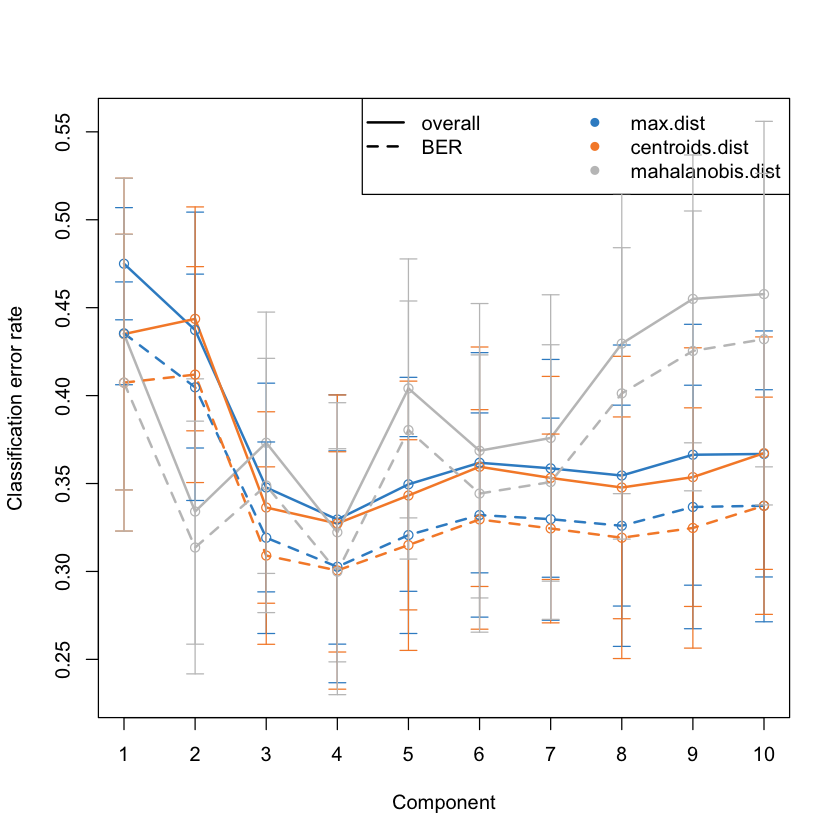

In [145]:
plot(perf.plsda, col = color.mixo(1:3), sd = TRUE, legend.position = "horizontal")

##### ROC

$Comp1
                             AUC   p-value
Control of MR vs Other(s) 0.6696 0.1947000
MR vs Other(s)            1.0000 0.0004022
RMC vs Other(s)           0.7589 0.0477800

$Comp2
                          AUC   p-value
Control of MR vs Other(s)   1 0.0001323
MR vs Other(s)              1 0.0004022
RMC vs Other(s)             1 0.0001323

$Comp3
                          AUC   p-value
Control of MR vs Other(s)   1 0.0001323
MR vs Other(s)              1 0.0004022
RMC vs Other(s)             1 0.0001323

$Comp4
                          AUC   p-value
Control of MR vs Other(s)   1 0.0001323
MR vs Other(s)              1 0.0004022
RMC vs Other(s)             1 0.0001323

$Comp5
                          AUC   p-value
Control of MR vs Other(s)   1 0.0001323
MR vs Other(s)              1 0.0004022
RMC vs Other(s)             1 0.0001323

$Comp6
                          AUC   p-value
Control of MR vs Other(s)   1 0.0001323
MR vs Other(s)              1 0.0004022
RMC vs Other(s)      

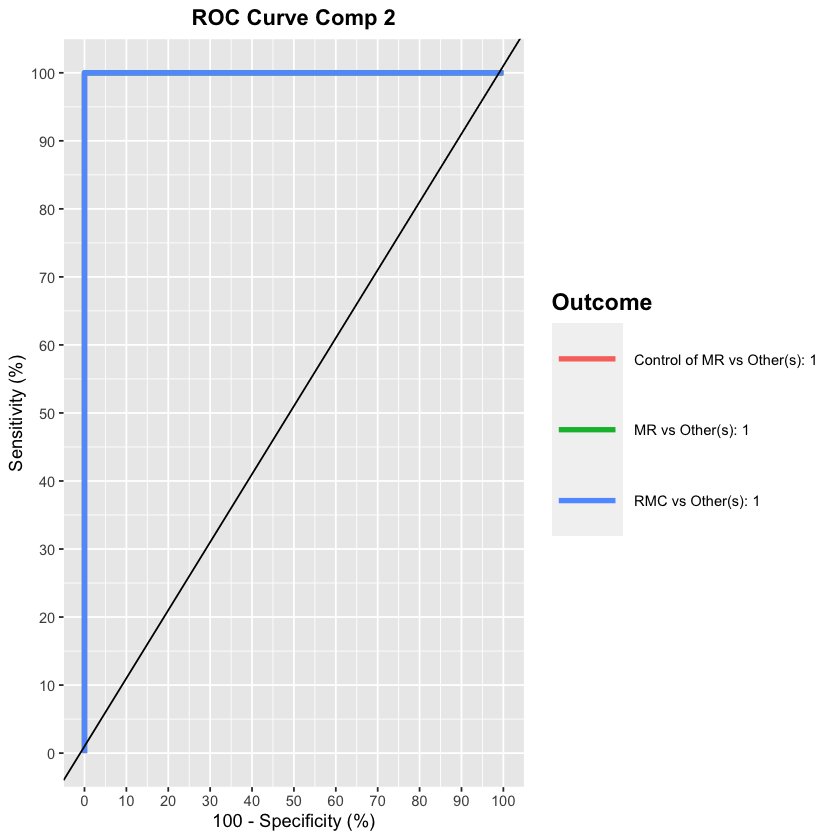

In [147]:
auc.plsda <- auroc(plsda.res, roc.comp = 2)

##### sPLS-DA for variable selection (tuning)

In [148]:
X <- data_nr$genes
Y <- as.factor(data_nr$metadata$Condition)

In [ ]:
# grid of possible keepX values that will be tested for each comp 
list.keepX <- c(seq(10, 100, 10))

tune.splsda <- tune.splsda(X, Y, ncomp = 10, validation = 'Mfold', folds = 5, 
                           progressBar = TRUE, dist = 'max.dist',
                           test.keepX = list.keepX, nrepeat = 100) #nrepeat 50-100 for better estimate
# tune.splsda.srbct  #the various outputs


comp 1 
  |====================                                                  |  28%

### sPLS-DA

Biological question :
- classify my samples into known groups
- predict the class of new samples
- identify the key variables that drive such discrimination

In [47]:
X <- data$genes
Y <- as.factor(data$metadata$Condition)

In [48]:
splsda.res <- splsda(X, Y, keepX = c(25,20, 15), ncomp = 3)

#### All cohorts 

##### Sample plots

###### Components 1 & 2

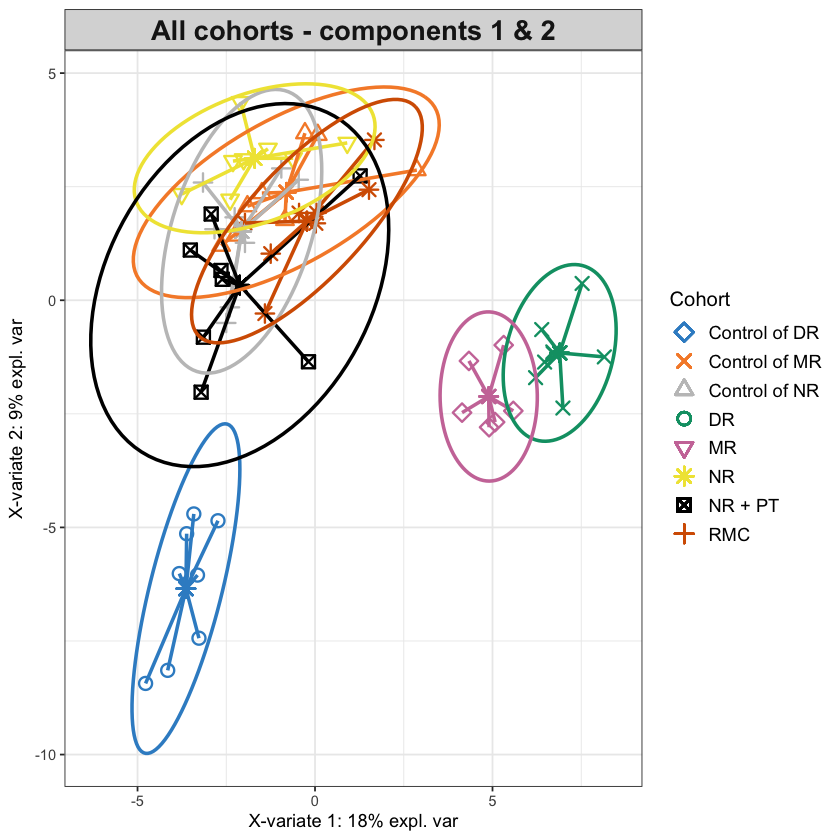

In [49]:
plotIndiv(splsda.res, 
          group = data$metadata$Condition, 
          legend = TRUE,
          legend.title = "Cohort",
          ellipse = TRUE,
          centroid = TRUE,
          star = TRUE,
          title = "All cohorts - components 1 & 2",
          ind.names = FALSE)   

###### Components 1 & 3

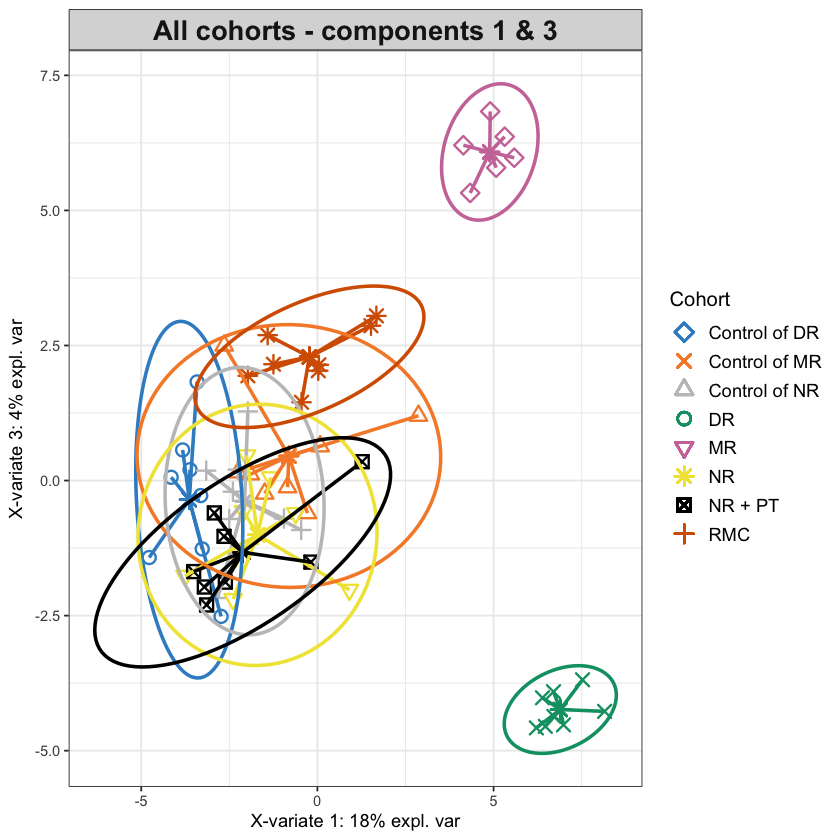

In [50]:
plotIndiv(splsda.res, 
          group = data$metadata$Condition, 
          legend = TRUE,
          legend.title = "Cohort",
          ellipse = TRUE,
          centroid = TRUE,
          star = TRUE,
          title = "All cohorts - components 1 & 3",
          ind.names = FALSE,
          comp = c(1,3)) 

###### Components 2 & 3

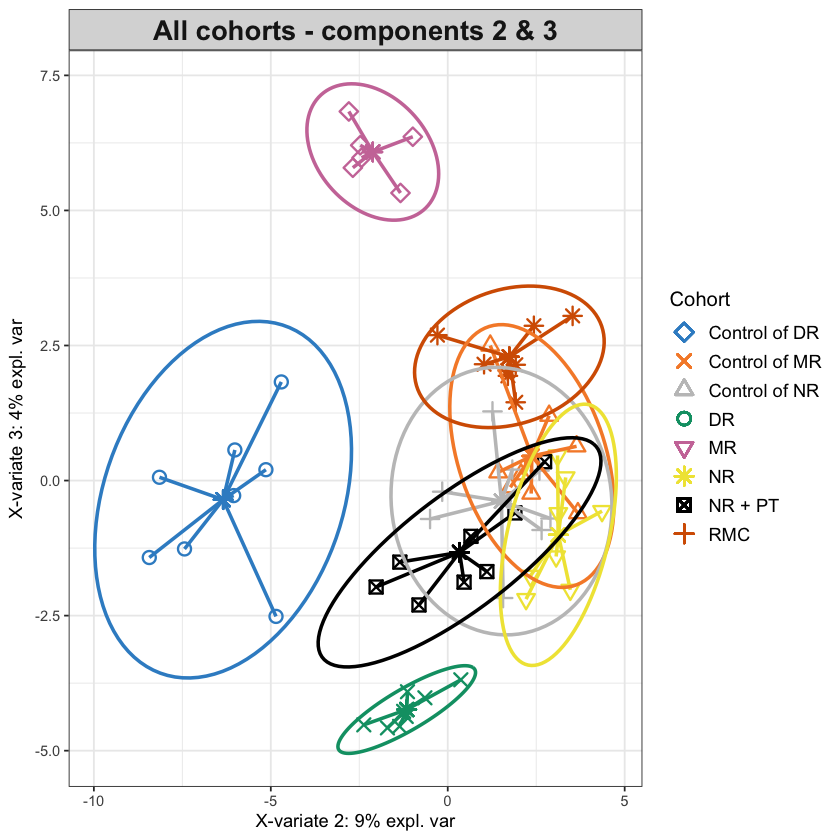

In [51]:
plotIndiv(splsda.res, 
          group = data$metadata$Condition, 
          legend = TRUE,
          legend.title = "Cohort",
          ellipse = TRUE,
          centroid = TRUE,
          star = TRUE,
          title = "All cohorts - components 2 & 3",
          ind.names = FALSE,
          comp = c(2,3)) 

##### Variable plots

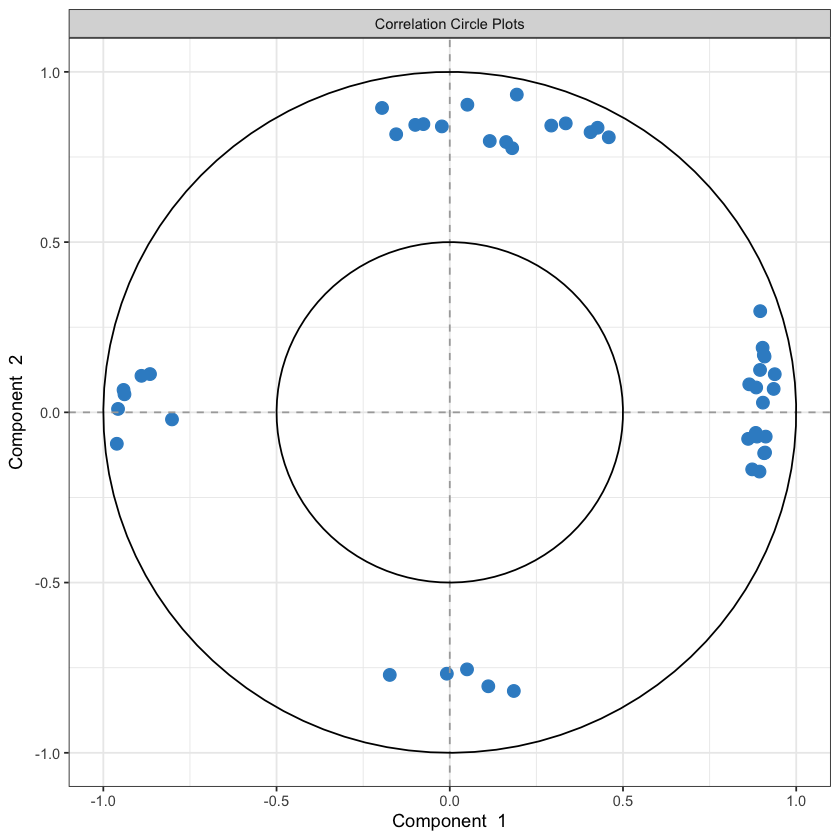

In [52]:
plotVar(splsda.res, pch = 20)

'ndisplay' value is larger than the number of selected variables! It has been reseted to 25 for block X



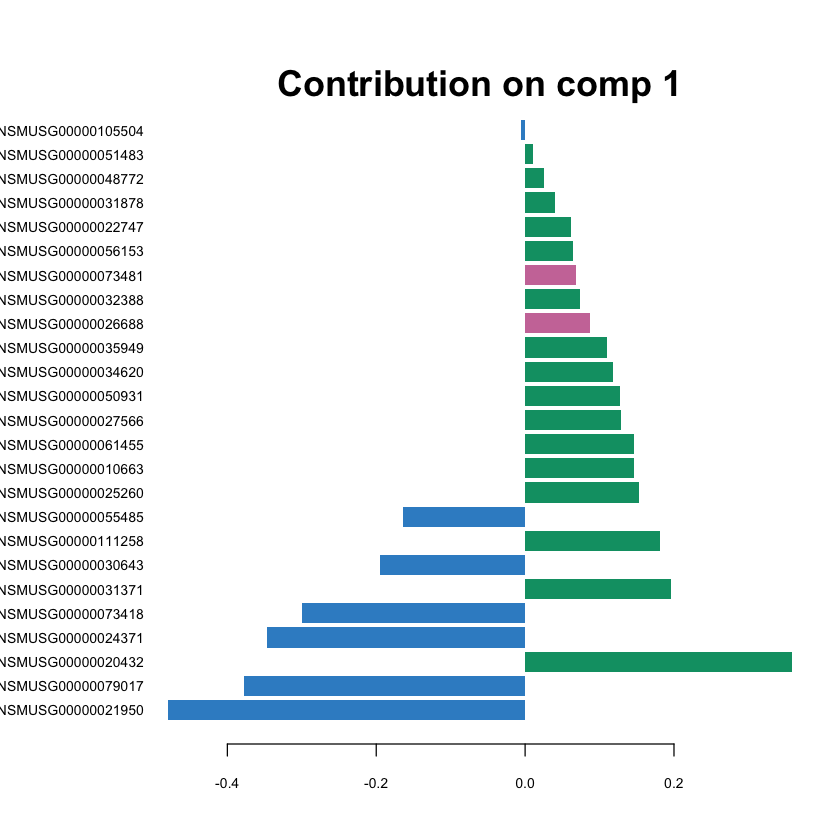

In [53]:
plotLoadings(splsda.res, contrib = 'max', method = 'mean', legend = FALSE, ndisplay = 100)

'ndisplay' value is larger than the number of selected variables! It has been reseted to 20 for block X



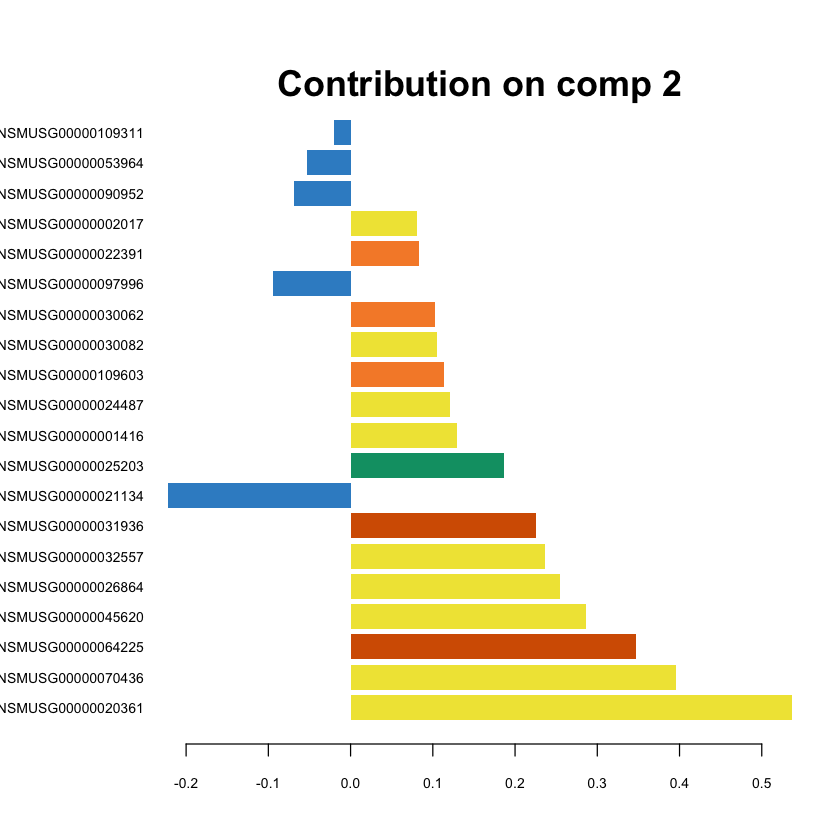

In [34]:
plotLoadings(splsda.res, comp = 2, contrib = 'max', method = 'mean', legend = FALSE, ndisplay = 100)

'ndisplay' value is larger than the number of selected variables! It has been reseted to 15 for block X



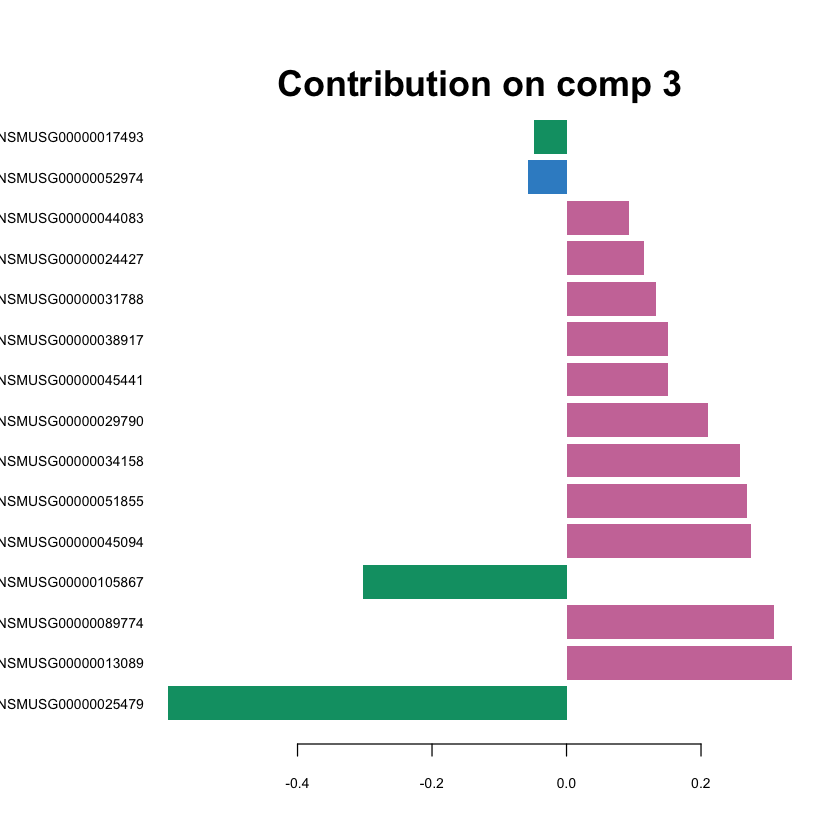

In [56]:
plotLoadings(splsda.res, comp = 3, contrib = 'max', method = 'mean', legend = FALSE, ndisplay = 100)

##### Background prediction

In [57]:
background <- background.predict(splsda.res, comp.predicted = 2, dist = "max.dist") 

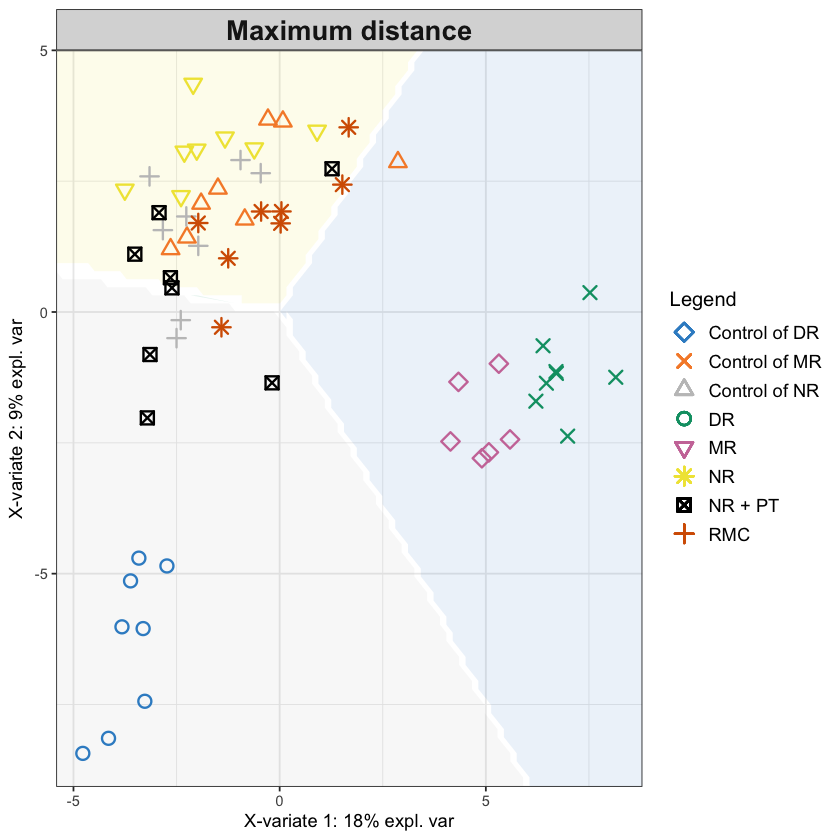

In [58]:
plotIndiv(splsda.res, comp = 1:2, group = Y,
          ind.names = FALSE, title = "Maximum distance",
          legend = TRUE,  background = background)

##### ROC

$Comp1
                             AUC   p-value
Control of DR vs Other(s) 0.9676 2.219e-05
Control of MR vs Other(s) 0.4699 7.849e-01
Control of NR vs Other(s) 0.6528 1.658e-01
DR vs Other(s)            1.0000 5.744e-06
MR vs Other(s)            0.8571 4.275e-03
NR vs Other(s)            0.5972 3.778e-01
NR + PT vs Other(s)       0.7130 5.338e-02
RMC vs Other(s)           0.3773 2.658e-01

$Comp2
                             AUC   p-value
Control of DR vs Other(s) 1.0000 5.744e-06
Control of MR vs Other(s) 0.7546 2.090e-02
Control of NR vs Other(s) 0.7454 2.603e-02
DR vs Other(s)            1.0000 5.744e-06
MR vs Other(s)            0.8601 3.965e-03
NR vs Other(s)            0.9722 1.839e-05
NR + PT vs Other(s)       0.7569 1.976e-02
RMC vs Other(s)           0.6481 1.790e-01

$Comp3
                             AUC   p-value
Control of DR vs Other(s) 1.0000 5.744e-06
Control of MR vs Other(s) 0.7639 1.668e-02
Control of NR vs Other(s) 0.7616 1.765e-02
DR vs Other(s)            1.000

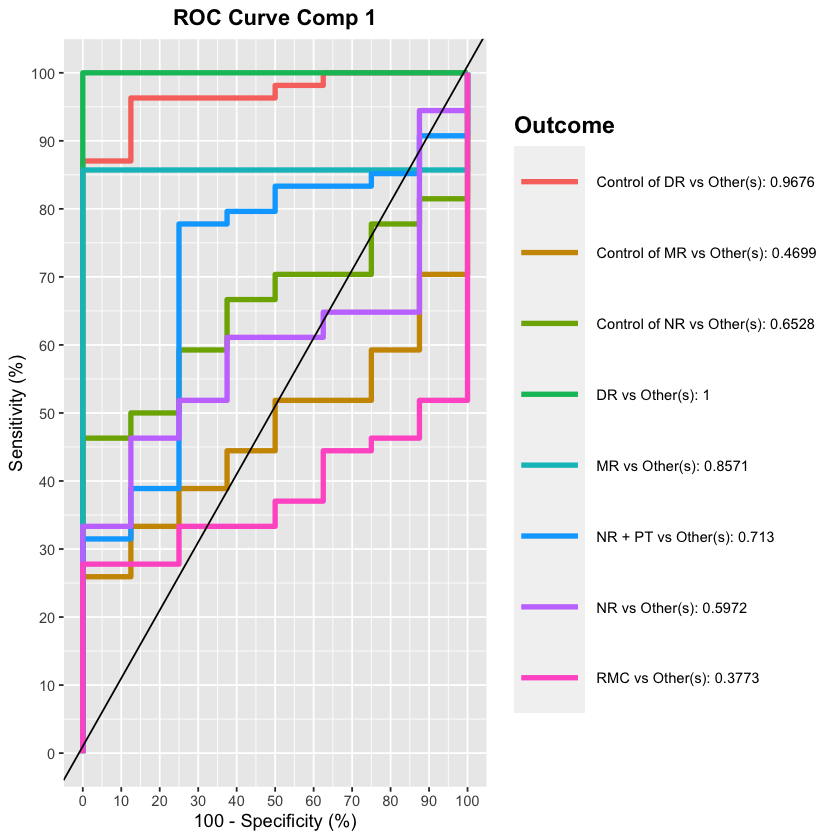

In [37]:
auc.plsda <- auroc(splsda.res)

#### NR - MR - DR cohort

In [128]:
X <- data_dr$genes
Y <- as.factor(data_dr$metadata$Condition)

In [129]:
splsda.res <- splsda(X, Y, keepX = c(25,20, 15), ncomp = 3)

##### Sample plots

###### Components 1 & 2

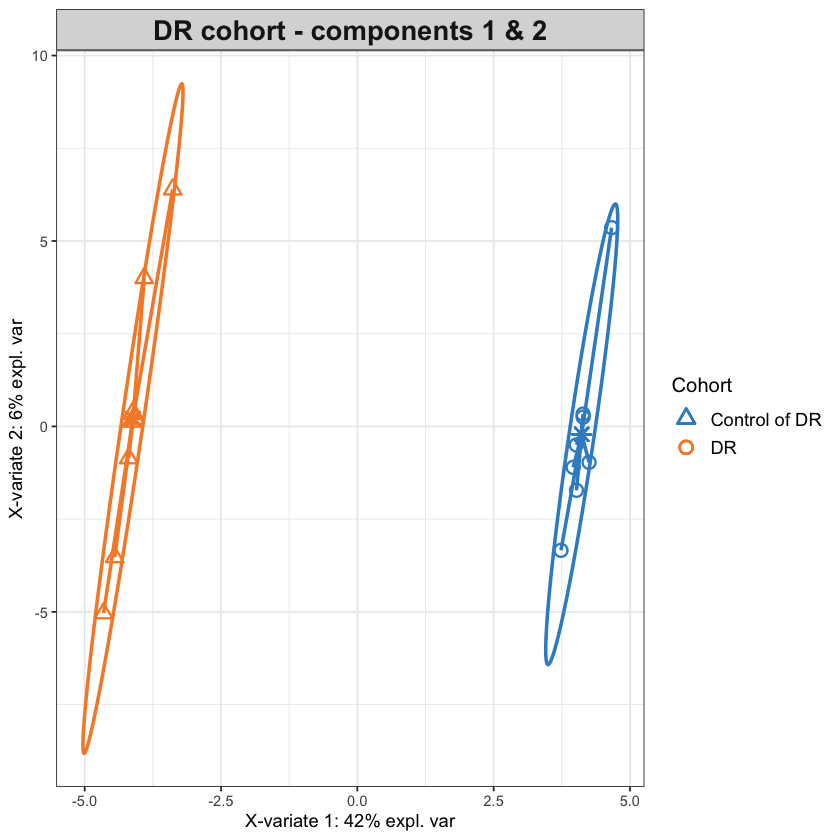

In [130]:
plotIndiv(splsda.res, 
          group = Y, 
          legend = TRUE,
          legend.title = "Cohort",
          ellipse = TRUE,
          centroid = TRUE,
          star = TRUE,
          title = "DR cohort - components 1 & 2",
          ind.names = FALSE)   

###### Components 1 & 3

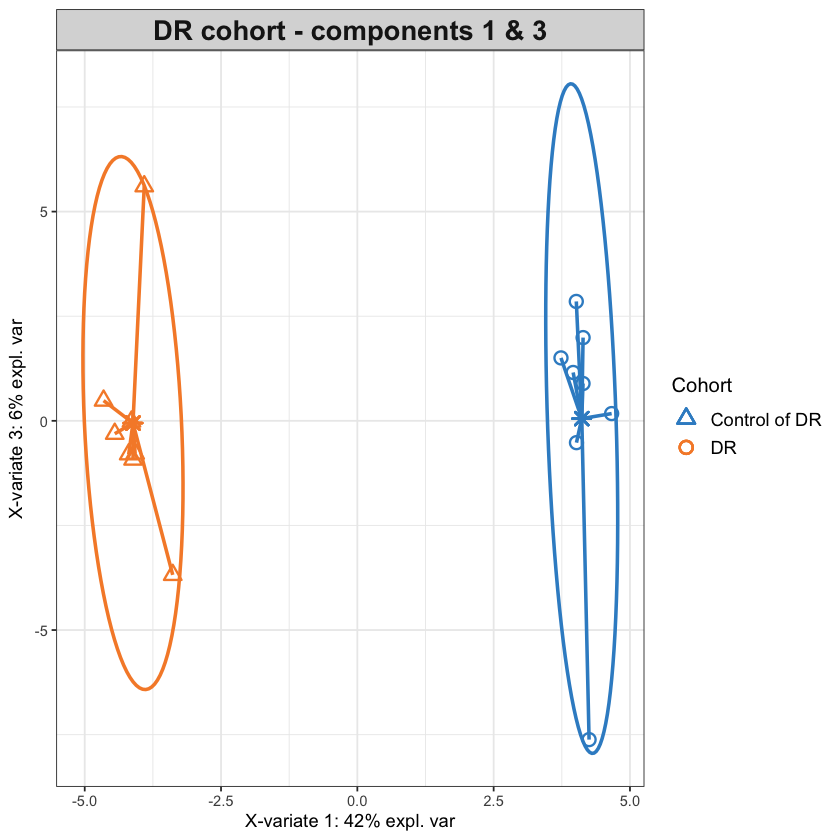

In [131]:
plotIndiv(splsda.res, 
          group = Y, 
          legend = TRUE,
          legend.title = "Cohort",
          ellipse = TRUE,
          centroid = TRUE,
          star = TRUE,
          title = "DR cohort - components 1 & 3",
          ind.names = FALSE,
          comp = c(1,3))   

###### Components 2 & 3

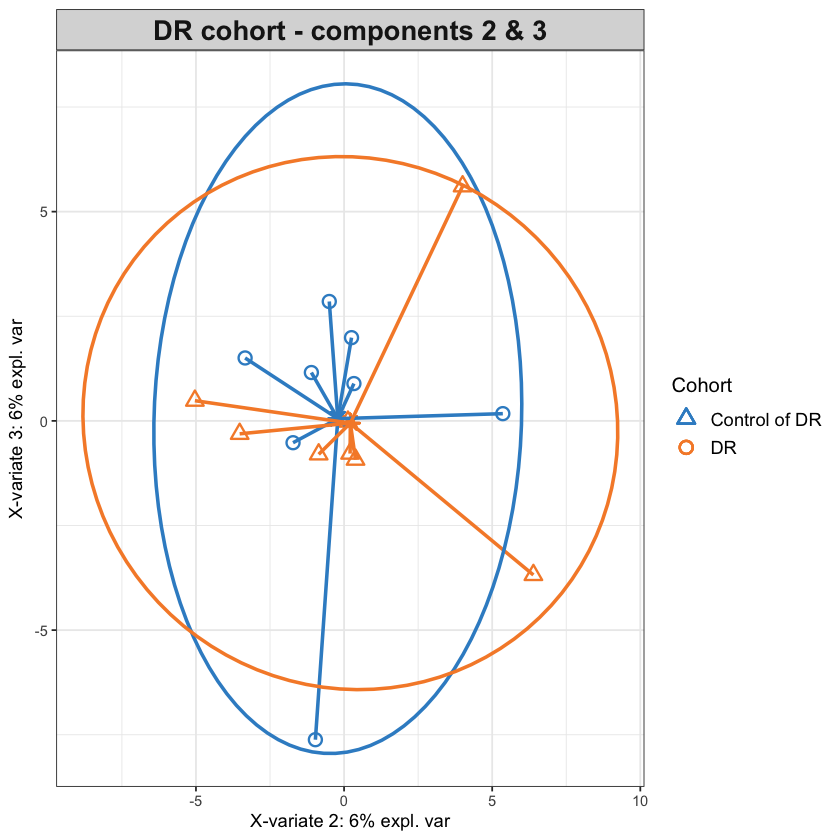

In [132]:
plotIndiv(splsda.res, 
          group = Y, 
          legend = TRUE,
          legend.title = "Cohort",
          ellipse = TRUE,
          centroid = TRUE,
          star = TRUE,
          title = "DR cohort - components 2 & 3",
          ind.names = FALSE,
          comp = c(2,3))   

##### Variable plots

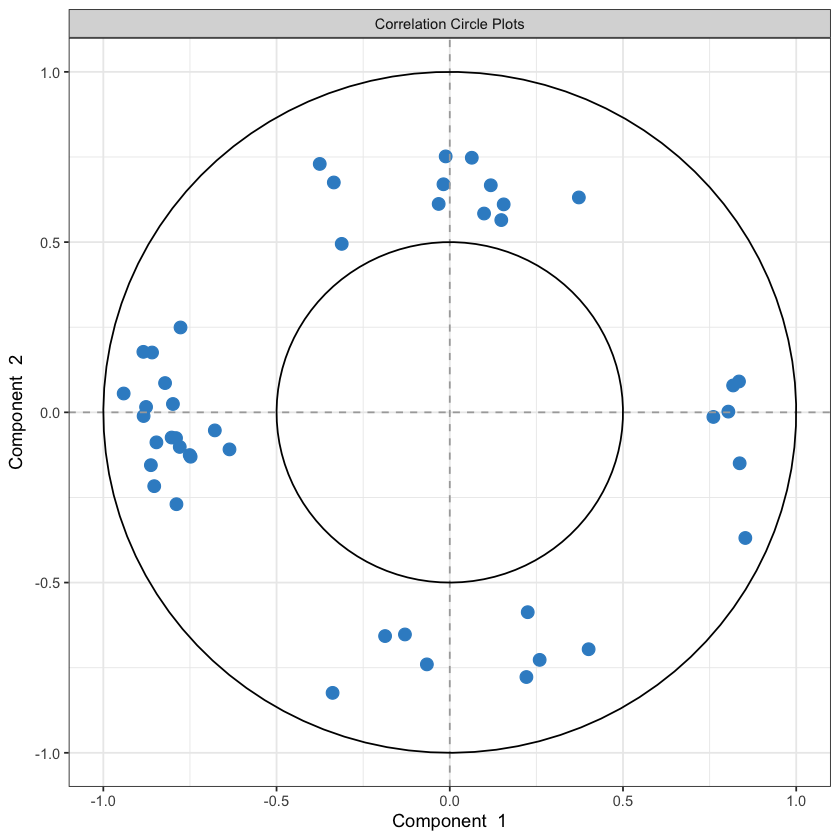

In [142]:
plotVar(splsda_nr.res, pch = 20)

'ndisplay' value is larger than the number of selected variables! It has been reseted to 25 for block X



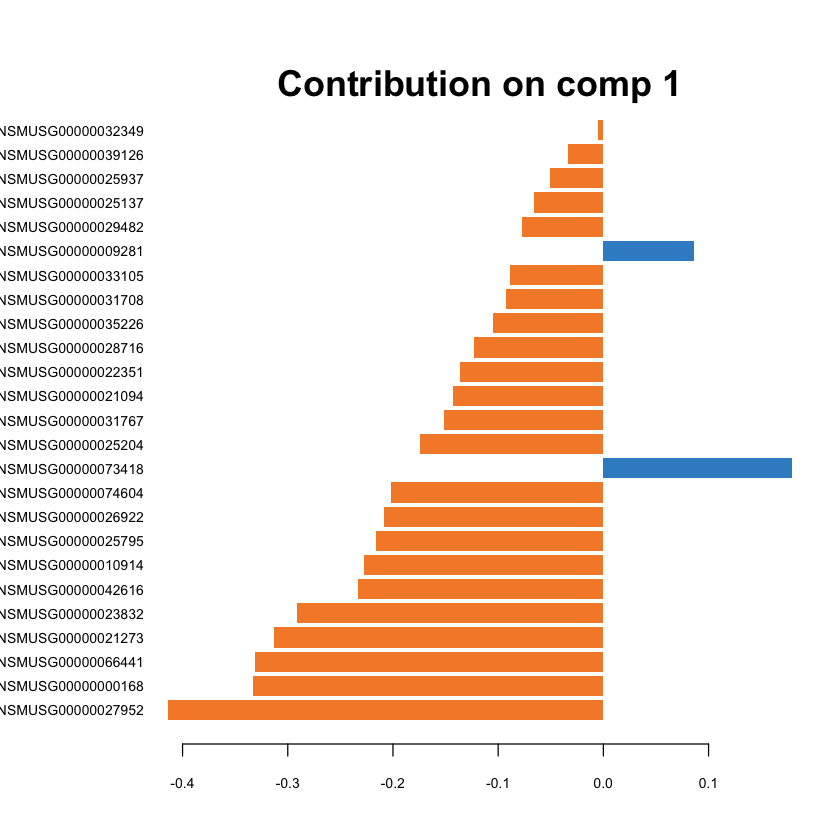

In [134]:
plotLoadings(splsda.res, contrib = 'max', method = 'mean', legend = FALSE, ndisplay = 100)

'ndisplay' value is larger than the number of selected variables! It has been reseted to 20 for block X



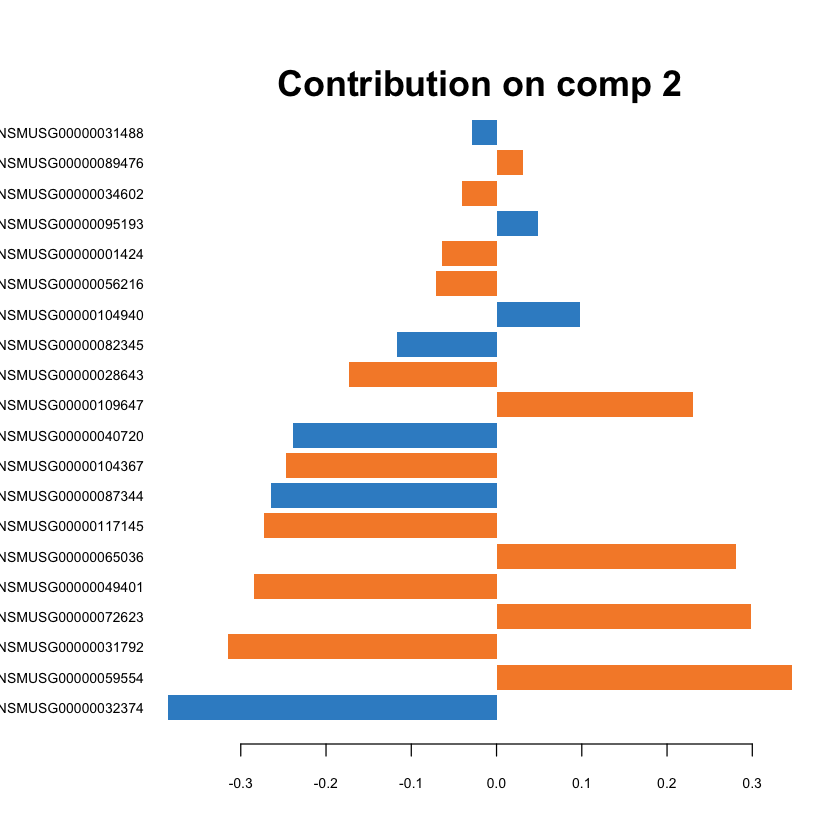

In [143]:
plotLoadings(splsda.res, comp = 2, contrib = 'max', method = 'mean', legend = FALSE, ndisplay = 100)

'ndisplay' value is larger than the number of selected variables! It has been reseted to 15 for block X



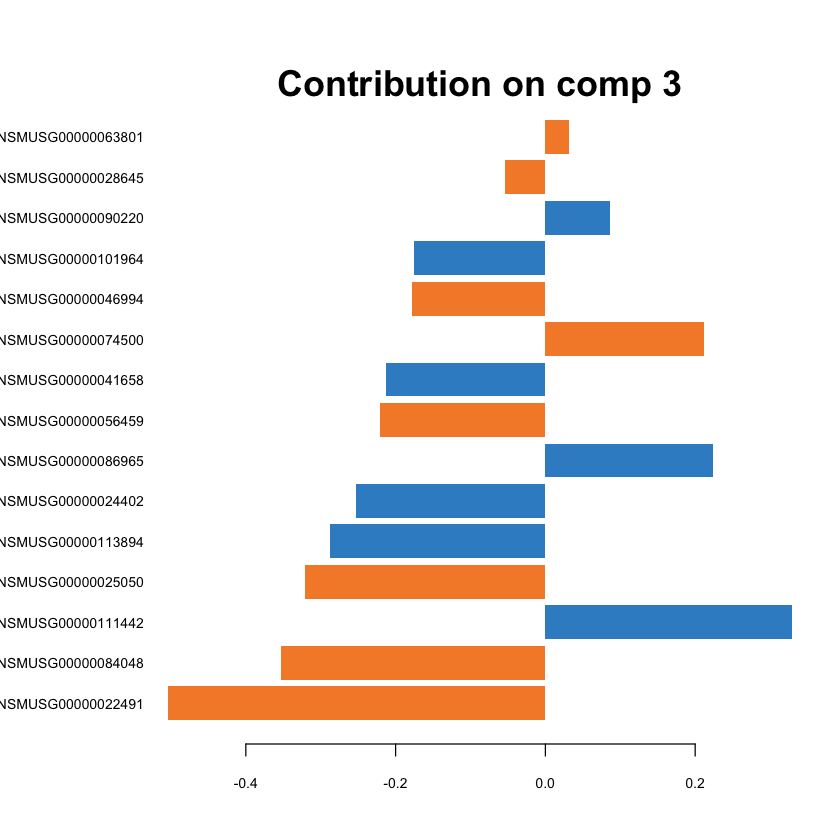

In [136]:
plotLoadings(splsda.res, comp = 3, contrib = 'max', method = 'mean', legend = FALSE, ndisplay = 100)

##### Background prediction

In [137]:
background <- background.predict(splsda.res, comp.predicted = 2, dist = "max.dist") 

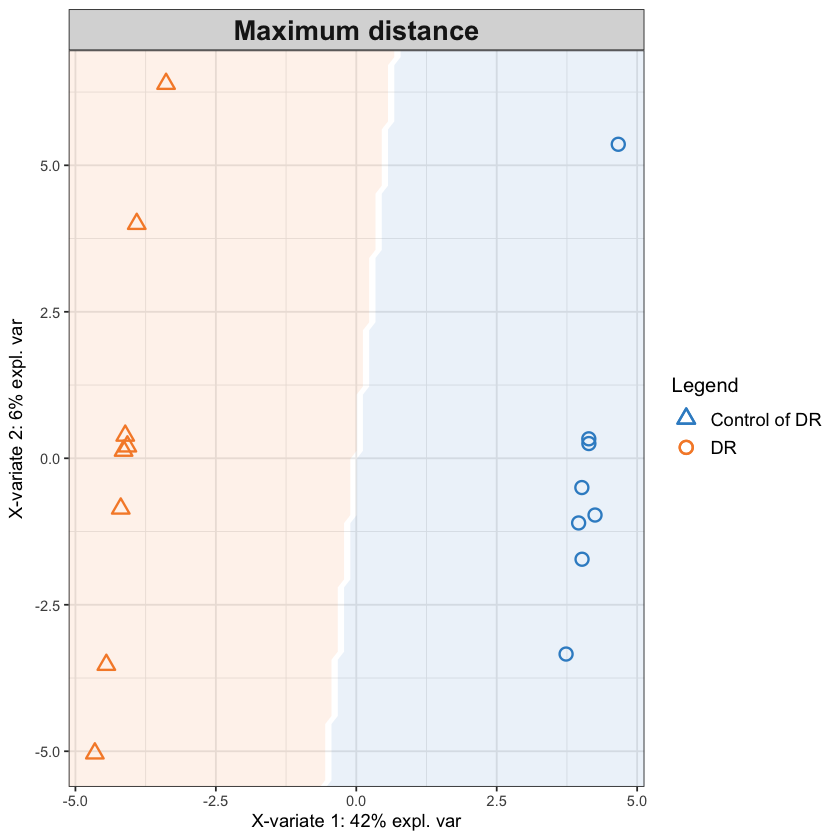

In [138]:
plotIndiv(splsda.res, comp = 1:2, group = Y,
          ind.names = FALSE, title = "Maximum distance",
          legend = TRUE,  background = background)